__Exploratory Data Analysis__

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns


reddata= pd.read_csv('winequality-red.csv',sep=';')
whitedata = pd.read_csv('winequality-white.csv',sep=';')
name=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]



featurename=name[0:(len(name)-1)]
labelname=name[len(name)-1]
#print features

redfeatures=reddata[featurename]
whitefeatures=whitedata[featurename]
redLabels=reddata[labelname]
whiteLabels=whitedata[labelname]

#see if there are any NA or NaN 
print reddata.size -reddata.dropna().size
print whitedata.size- whitedata.dropna().size

#print out the datatypes
print reddata.dtypes

0
0
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [5]:
#combining the 2 datasets
redCol=['red']*reddata.shape[0]
whiteCol=['white']*whitedata.shape[0]

redfeatures2= redfeatures.assign(color=redCol)
whitefeatures2=whitefeatures.assign(color=whiteCol)
mixedfeatures=pd.concat([redfeatures2,whitefeatures2])

mixedlabels=pd.concat([redLabels,whiteLabels])
mixeddata= mixedfeatures.assign(quality=mixedlabels)
featname2=featurename + ['color']

In [109]:
print redfeatures.shape
print whitefeatures.shape

(1599, 11)
(4898, 11)


it seems that there are no NA or NAN values. All of the dtypes of the features are float64, which means they are numeric variables.Next, I will look at the summary statistics. The dependent values are ordinal. There are for more samples from the white wine.

In [83]:
print reddata.describe()

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [84]:
print whitedata.describe()

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [19]:
print mixeddata.describe()

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

So far, the red wine has quality values 3-8, and the white whine has the quality values 3-9.I will now look at the distribution of the features for red wine and for the white wine

For the white whine the number of 3's and 9 are extremely low, while the number of 4's and 8's are low. 5 and 6 are like the most common. Next is the count plot of the combined data for each quality.

Now I will begin plotting the distributions or counts of the variables. The red wine stats will be red, the white wine stats will be silver colored, and the mixed data stats will be blue, up until the the correlation graphs.

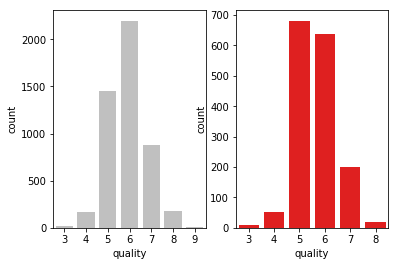

In [87]:
fig, axs = plt.subplots(ncols=2)
sns.countplot(x=whiteLabels,ax=axs[0],color='silver',)
sns.countplot(x=redLabels,ax=axs[1],color='red')

For the white whine the number of 3's and 9 are extremely low, while the number of 4's and 8's are low. 5 and 6 are like the most common.Samples with data points 1,2 and 10 don't exist. Next is the count plot of the combined data for each quality.

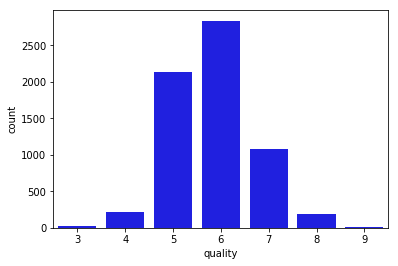

In [21]:
sns.countplot(x=mixedlabels,color='blue')

Here I will used clustering methods to analyze and label the data. I will look for what patterns the clusters can discern and if they match the classification algorithms.

I will now try SVM with a 'rbf' kernel for classification and regression. The hyperparameters being tuned are gamma and C. C is the penalty of the error term and gamma is the kernel coefficient for the rbf. First classification will be done the the normalized data set that still has outliers. 

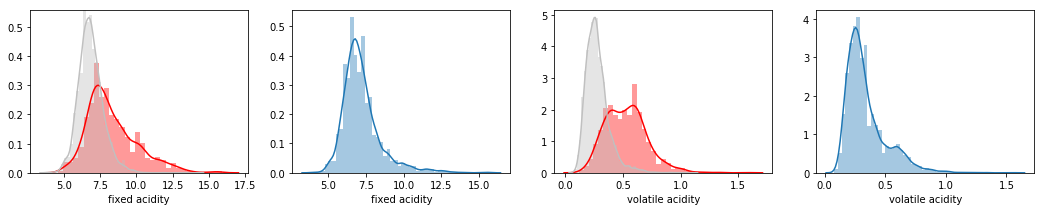

In [88]:
fig, axs = plt.subplots(ncols=4,figsize=(18,3))

sns.distplot(redfeatures['fixed acidity'],color='red',ax=axs[0])

sns.distplot(whitefeatures['fixed acidity'],color='silver',ax=axs[0])

sns.distplot(mixedfeatures["fixed acidity"],ax=axs[1])
sns.distplot(redfeatures["volatile acidity"], color='red',ax=axs[2])

sns.distplot(whitefeatures["volatile acidity"],ax=axs[2],color='silver')

sns.distplot(mixedfeatures["volatile acidity"],ax=axs[3])

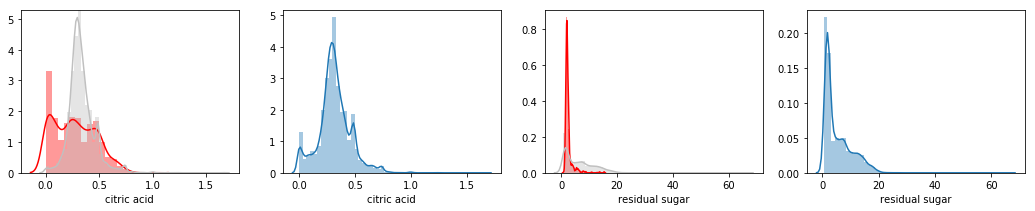

In [89]:
fig, axs = plt.subplots(ncols=4,figsize=(18,3))

sns.distplot(redfeatures["citric acid"],color='red',ax=axs[0])

sns.distplot(whitefeatures["citric acid"],color='silver',ax=axs[0])
sns.distplot(mixedfeatures["citric acid"],ax=axs[1])
sns.distplot(redfeatures["residual sugar"], color='red',ax=axs[2])

sns.distplot(whitefeatures["residual sugar"],ax=axs[2],color='silver')

sns.distplot(mixedfeatures["residual sugar"],ax=axs[3])

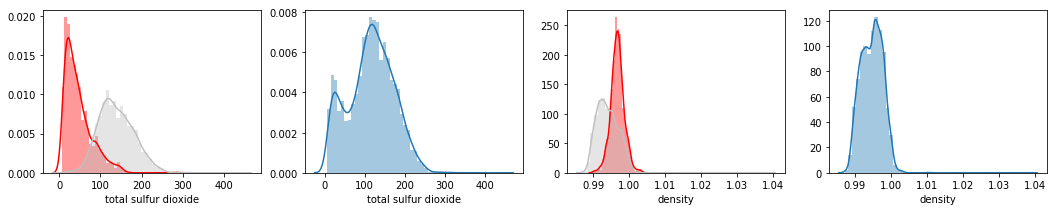

In [163]:
fig, axs = plt.subplots(ncols=4,figsize=(18,3))

sns.distplot(redfeatures["total sulfur dioxide"],color='red',ax=axs[0])

sns.distplot(whitefeatures["total sulfur dioxide"],color='silver',ax=axs[0])

sns.distplot(mixedfeatures["total sulfur dioxide"],ax=axs[1])
sns.distplot(redfeatures["density"], color='red',ax=axs[2])

sns.distplot(whitefeatures["density"],ax=axs[2],color='silver')

sns.distplot(mixedfeatures["density"],ax=axs[3])

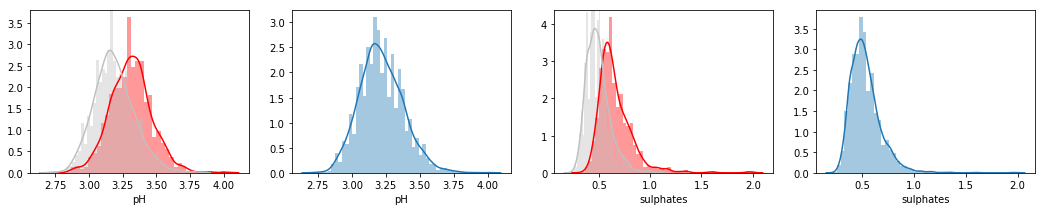

In [90]:
fig, axs = plt.subplots(ncols=4,figsize=(18,3))

sns.distplot(redfeatures["pH"],color='red',ax=axs[0])

sns.distplot(whitefeatures["pH"],color='silver',ax=axs[0])

sns.distplot(mixedfeatures["pH"],ax=axs[1])
sns.distplot(redfeatures["sulphates"], color='red',ax=axs[2])

sns.distplot(whitefeatures["sulphates"],ax=axs[2],color='silver')

sns.distplot(mixedfeatures["sulphates"],ax=axs[3])

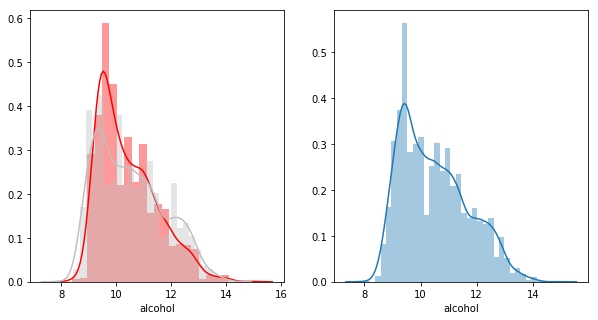

In [167]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.distplot(mixedfeatures["alcohol"],ax=axs[1])

sns.distplot(redfeatures["alcohol"],ax=axs[0],color='red')
sns.distplot(whitefeatures["alcohol"],ax=axs[0],color='silver')

Now I will look at the correlation plots

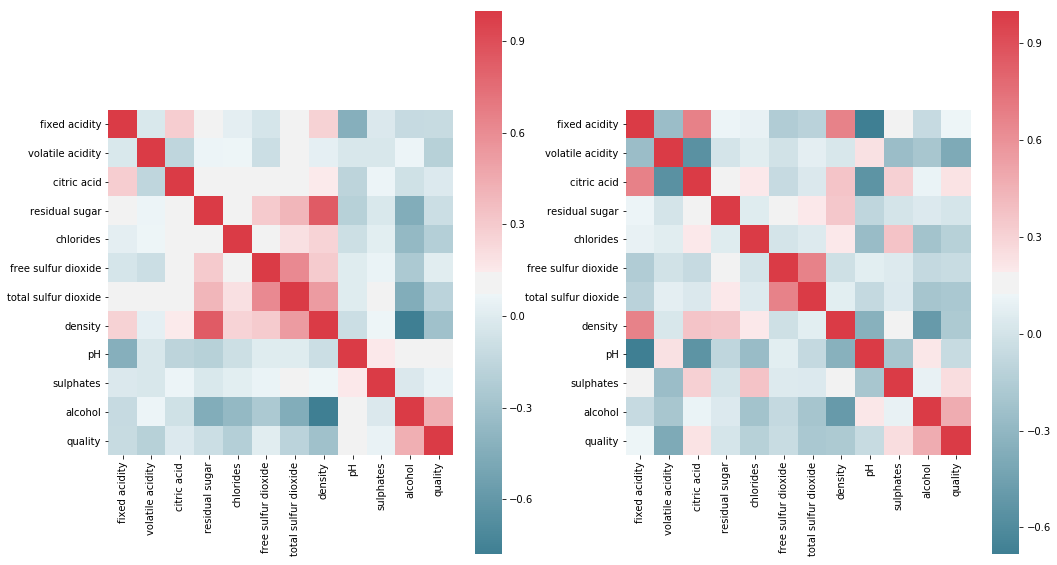

In [91]:
f, ax = plt.subplots(figsize=(17, 10),ncols=2)
sns.heatmap(whitedata.corr(), mask=np.zeros_like(whitedata.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[0])

sns.heatmap(reddata.corr(), mask=np.zeros_like(reddata.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[1])

The left is white wine and the right is red. There seems to be a negative correlation between density and alcohol levels.he left is white wine and the right is red.There seems to be a negative correlation between density and alcohol levels;
it is very strong in  in white wine and moderatly strong in red wine
In white wine, there is a strong correlation between residual sugar and density; this is not as strong in red wine
Fixed acidity and pH seem to have a strong correlation too.

Citric acid has a strong negative correlation with volatile acidity in white wine while having a weaker negative
correlation in red wine.
pH and citric acid levels have a high negative correlation with the red wine and a much lower negative correlation in the white wine.
Fixed acidity and pH levels seem to be very strongly negatively correlated in red wine but not as much in white wine.
Residual sugar and the sulfur dioxide levels are more neutral in red wine
Total sulphur dioxide is moderately positively correlated in white wine but its more neutral in red wine.

Next I will look at a Correlation Heat Map for red and white wine using Spearman's correlation coefficient.

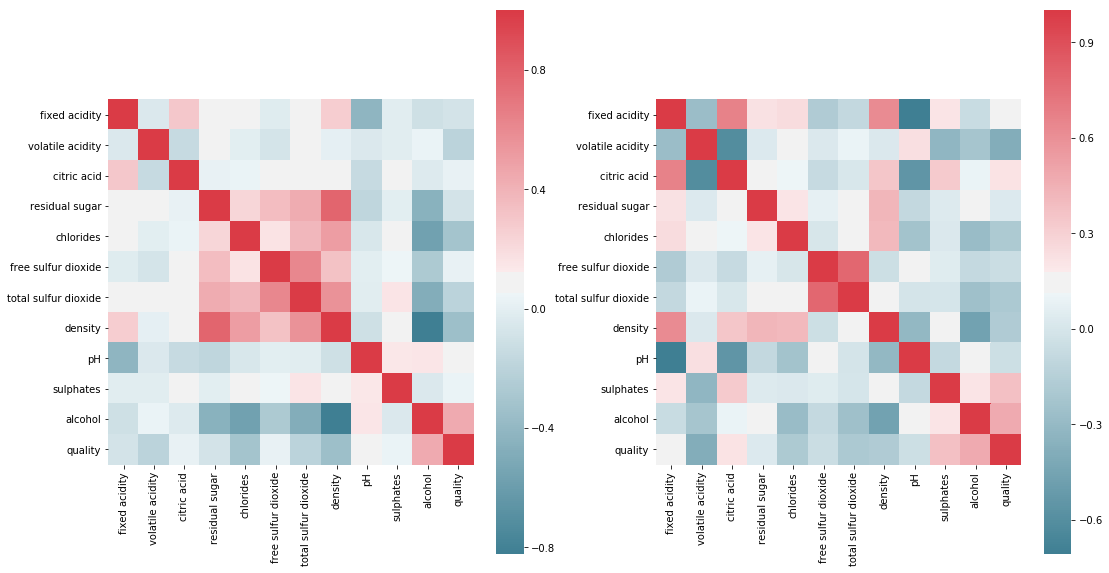

In [18]:
f, ax = plt.subplots(figsize=(18, 10),ncols=2)
sns.heatmap(whitedata.corr(method='spearman'), mask=np.zeros_like(whitedata.corr(method='spearman'), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[0])

sns.heatmap(reddata.corr(method='spearman'), mask=np.zeros_like(reddata.corr(method='spearman'), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[1])

The left is white wine and the right is red. It is mostly the same as the charts before.Next I will look at the correlation coefficients for mixed data

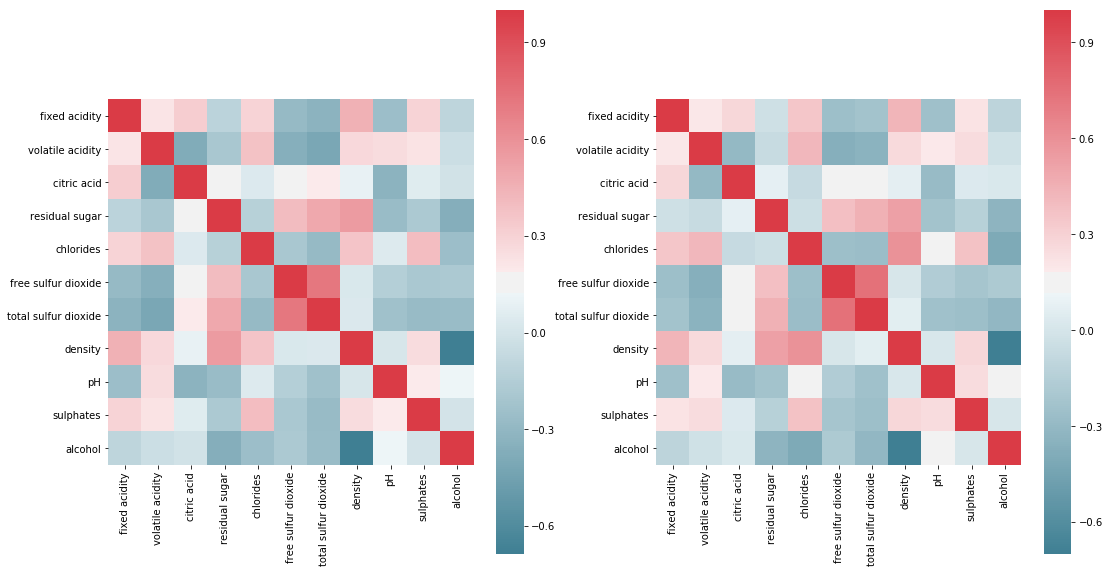

In [96]:
f, ax = plt.subplots(figsize=(18, 10),ncols=2)
mixedtemp=pd.concat([redfeatures,whitefeatures])
sns.heatmap(mixedtemp.corr(), mask=np.zeros_like(mixedtemp.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[0])

sns.heatmap(mixedtemp.corr(method='spearman'), mask=np.zeros_like(mixedtemp.corr(method='spearman'), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[1])

On the left is Pearson's Correlation Coefficient, and on the right is Spearman's correlation coefficient

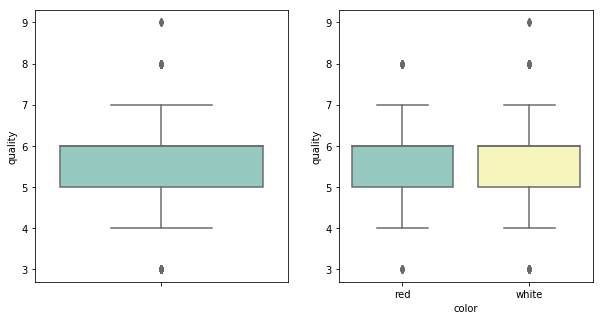

In [23]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot( y="quality" ,
             data=mixeddata, palette="Set3",ax=axs[0])
sns.boxplot(x="color", y="quality" ,
             data=mixeddata, palette="Set3",ax=axs[1])

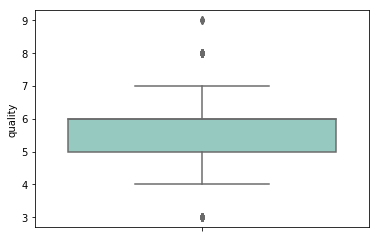

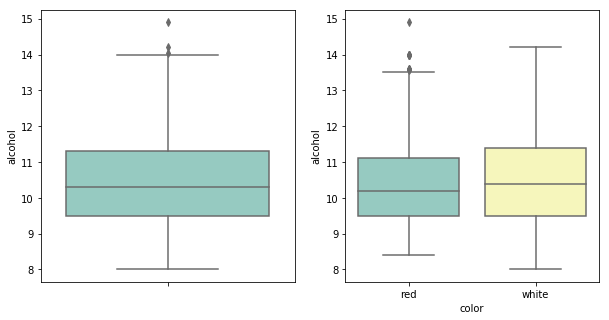

In [28]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot( y="alcohol" ,data=mixeddata, palette="Set3",ax=axs[0])
sns.boxplot(x="color", y="alcohol",data=mixeddata, palette="Set3",ax=axs[1] )

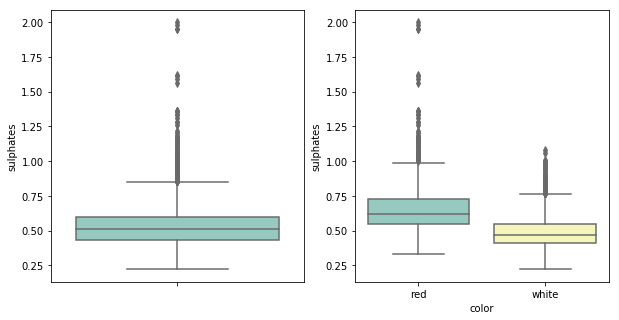

In [29]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot( y="sulphates" ,data=mixeddata, palette="Set3",ax=axs[0])
sns.boxplot(x="color", y="sulphates",data=mixeddata, palette="Set3",ax=axs[1] )

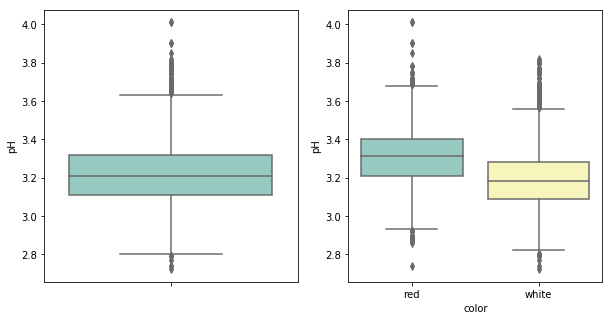

In [30]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot( y="pH" ,data=mixeddata, palette="Set3",ax=axs[0])
sns.boxplot(x="color", y="pH",data=mixeddata, palette="Set3",ax=axs[1] )

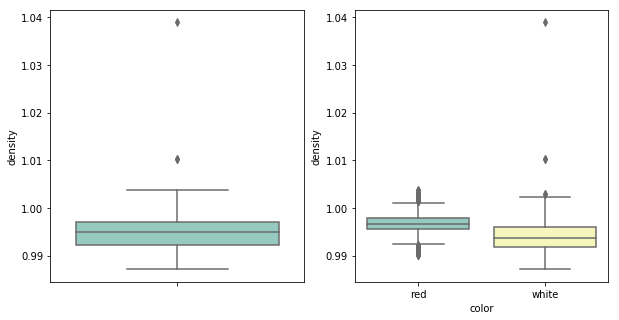

In [31]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot( y="density"  ,data=mixeddata, palette="Set3",ax=axs[0])
sns.boxplot(x="color", y="density" ,data=mixeddata, palette="Set3",ax=axs[1] )

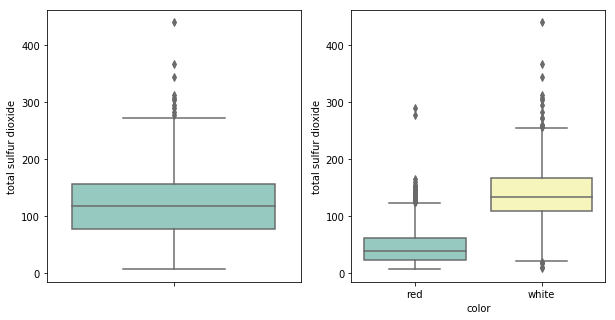

In [32]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot( y="total sulfur dioxide"  ,data=mixeddata, palette="Set3",ax=axs[0])
sns.boxplot(x="color", y="total sulfur dioxide" ,data=mixeddata, palette="Set3",ax=axs[1] )

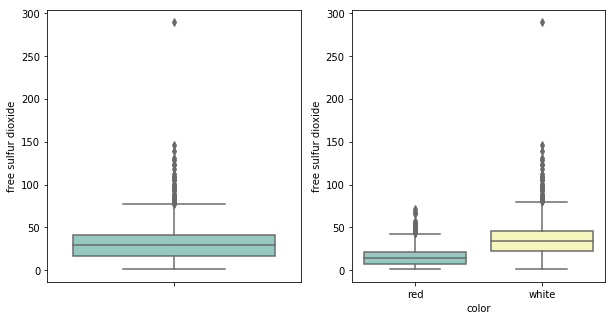

In [33]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot( y="free sulfur dioxide"  ,data=mixeddata, palette="Set3",ax=axs[0])
sns.boxplot(x="color", y="free sulfur dioxide" ,data=mixeddata, palette="Set3",ax=axs[1] )

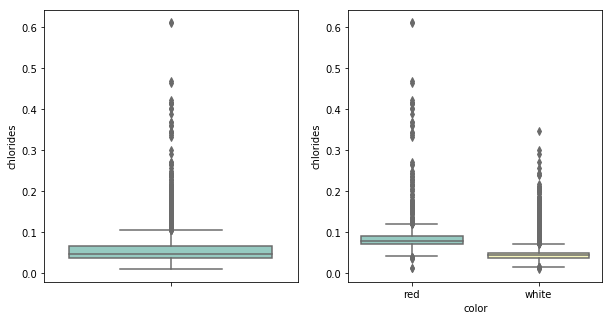

In [46]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot( y="chlorides"  ,data=mixeddata, palette="Set3",ax=axs[0])
sns.boxplot(x="color", y="chlorides" ,data=mixeddata, palette="Set3",ax=axs[1] )

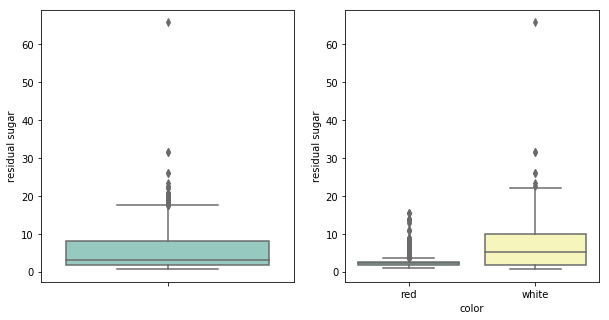

In [35]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot( y="residual sugar"  ,data=mixeddata, palette="Set3",ax=axs[0])
sns.boxplot(x="color", y="residual sugar" ,data=mixeddata, palette="Set3",ax=axs[1] )

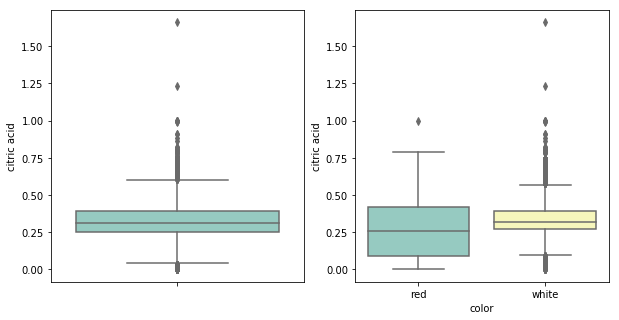

In [36]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot( y="citric acid"  ,data=mixeddata, palette="Set3",ax=axs[0])
sns.boxplot(x="color", y="citric acid" ,data=mixeddata, palette="Set3",ax=axs[1] )

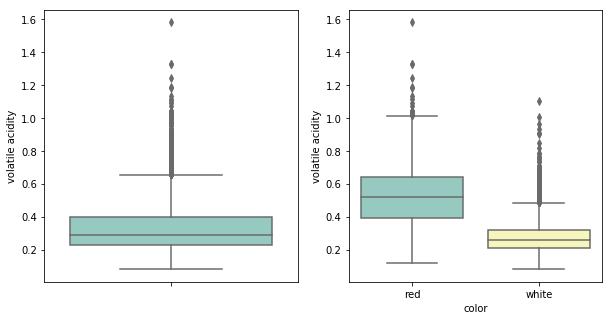

In [39]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot( y="volatile acidity" ,data=mixeddata, palette="Set3",ax=axs[0])
sns.boxplot(x="color", y="volatile acidity" ,data=mixeddata, palette="Set3",ax=axs[1] )

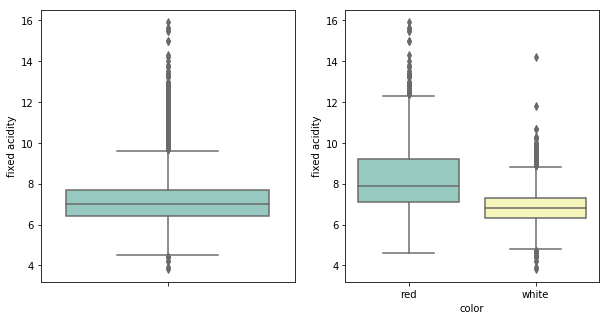

In [40]:
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.boxplot( y="fixed acidity" ,data=mixeddata, palette="Set3",ax=axs[0])
sns.boxplot(x="color", y="fixed acidity" ,data=mixeddata, palette="Set3",ax=axs[1] )

Now I will normalize the data

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(redfeatures)
redfeatures.loc[:,:] = scaled_values

scaled_values = scaler.fit_transform(whitefeatures)
whitefeatures.loc[:,:] = scaled_values

redfeatures2= redfeatures.assign(color=redCol)
whitefeatures2=whitefeatures.assign(color=whiteCol)
mixedfeatures_norm=pd.concat([redfeatures2,whitefeatures2])

#labels for the mixed data set
mixedlabels_norm=pd.concat([redLabels,whiteLabels])

#normalized mixed data
mixeddata_norm= mixedfeatures_norm.assign(quality=mixedlabels)

#one hot encoded normalized mixed data
mixeddata_norm_ohe= pd.get_dummies(mixedfeatures_norm, columns=["color"])
mixeddata_norm_ohe=mixeddata_norm_ohe.assign(quality=mixedlabels)
featname3= featurename + ['color_red','color_white']
name2 = featname3 + ['quality']

print mixeddata_norm_ohe

C:\Program Files\Anaconda227\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Program Files\Anaconda227\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Program Files\Anaconda227\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.247788          0.397260     0.000000        0.068493   0.106845   
1          0.283186          0.520548     0.000000        0.116438   0.143573   
2          0.283186          0.438356     0.040000        0.095890   0.133556   
3          0.584071          0.109589     0.560000        0.068493   0.105175   
4          0.247788          0.397260     0.000000        0.068493   0.106845   
5          0.247788          0.369863     0.000000        0.061644   0.105175   
6          0.292035          0.328767     0.060000        0.047945   0.095159   
7          0.238938          0.363014     0.000000        0.020548   0.088481   
8          0.283186          0.315068     0.020000        0.075342   0.101836   
9          0.256637          0.260274     0.360000        0.356164   0.098497   
10         0.185841          0.315068     0.080000        0.061644   0.141903   
11         0.256637         

Now I will remove outliers once the data is combined.

In [77]:
def remove_outlier(df0, col_name):
    Q1 = df0[col_name].quantile(0.25)
    Q3 = df0[col_name].quantile(0.75)
    IQR= Q3-Q1 #Interquartile range
    bound_low  = Q1-1.5*IQR
    bound_high = Q3+1.5*IQR
    df1 = df0.loc[(df0[col_name] > bound_low) & (df0[col_name] < bound_high)]
    return df1
mixeddata_norm_out=pd.concat([redfeatures2,whitefeatures2]).assign(quality=mixedlabels)
for col_name in mixeddata_norm_out:
    if col_name is not 'color' :
            if col_name is not 'quality':
                mixeddata_norm_out=remove_outlier(mixeddata_norm_out,col_name)

temp1=mixeddata_norm_out[featname2]
mixedlabels2=mixeddata_norm_out['quality']
mixeddata_norm_out_ohe0= pd.get_dummies(temp1, columns=["color"])

#final result, features+labels matrix of data normalized and trimmed of outliers
mixeddata_norm_out_ohe=mixeddata_norm_out_ohe0.assign(quality=mixedlabels2)

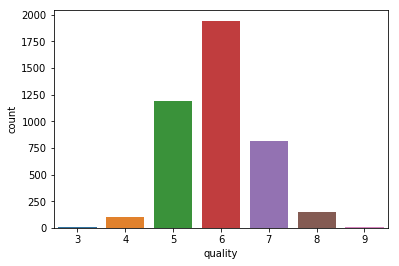

In [78]:
sns.countplot(x=mixedlabels2)

In [79]:
mixeddata_norm_out_ohe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_red,color_white,quality
count,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000,4221.000000
mean,0.289294,0.187519,0.196029,0.088788,0.098708,0.114570,0.293436,0.133626,0.425997,0.296496,0.415789,0.018716,0.981284,5.930348
std,0.074143,0.081630,0.057904,0.074594,0.029220,0.053857,0.099938,0.059144,0.125707,0.110711,0.195540,0.135536,0.135536,0.860607
min,0.086538,0.000000,0.024096,0.000000,0.020772,0.000000,0.003534,0.000000,0.100000,0.000000,0.064516,0.000000,0.000000,3.000000
25%,0.240385,0.127451,0.162651,0.018405,0.077151,0.073171,0.225058,0.087719,0.336364,0.209302,0.241935,0.000000,1.000000,5.000000
50%,0.288462,0.176471,0.186747,0.073620,0.097923,0.111498,0.285383,0.127048,0.418182,0.290698,0.403226,0.000000,1.000000,6.000000
75%,0.336538,0.235294,0.228916,0.139571,0.118694,0.149826,0.361949,0.173703,0.509091,0.372093,0.548387,0.000000,1.000000,6.000000
max,0.500000,0.470588,0.380000,0.296012,0.181009,0.292683,0.573086,0.349486,0.772727,0.593023,1.000000,1.000000,1.000000,9.000000


Correlation heat map of mixed data that is normalized and has trimmed the outliers

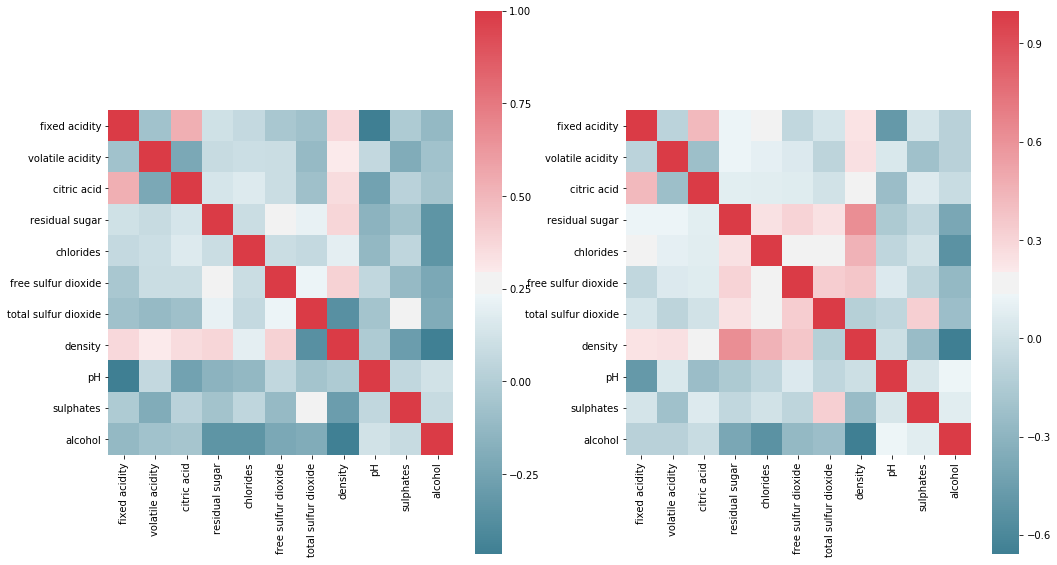

In [71]:
f, ax = plt.subplots(figsize=(17, 10),ncols=2)
sns.heatmap(temp1.corr(), mask=np.zeros_like(temp1.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[0])

sns.heatmap(temp1.corr(method='spearman'), mask=np.zeros_like(temp1.corr(method='spearman'), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[1])

The correlation between fixed acidity and pH has become more strongly correlated

__Supervised Learning__

The dependent variable is ordinal, so classification could work, but it might not pick up the scale, so regression is also
appropriate. However, I have only focused on classification. I will use Random Forests And Support Vector Machines to do these tasks. The hyperparameter optimization used is simulated annealing. It is faster than grid search and is prone to not getting stuck in local optima. It is also possibly faster than random search. I will look at a few metrics,but I will mainly use accuracy score.

In [31]:
from sklearn import metrics

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix

from sklearn.metrics import accuracy_score
import itertools

from simulated_annealing.optimize import SimulatedAnneal

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

class_names= list(np.arange(1,11,1))
class_names2=sorted(list(set(mixedlabels)))
class_names3=sorted(list(set(mixeddata_norm_out['quality'])))

#taken from sklearn docs
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

First I will look at Random Forests for  classification. I will do some hyperparameter optimization using the simulated annealing algorithm. I will be tuning the max number of features and the max number of estimators. 
max features is the number of features the algorithm is looking at in each split.
n_estimators is the number of trees in the algorithm.

In [36]:
def RFC(data,names,labelname):
 train, test = model_selection.train_test_split(data, train_size = 0.7, random_state=42)
 trainX=np.array(train[names])
 testX=np.array(test[names])
 trainY=np.array(train[labelname])
 testY=np.array(test[labelname])

 rf_params = {'n_estimators':np.linspace(10,2600,500).astype(int),'max_features': np.linspace(1,7,10).astype(int)}
          #  'max_depth':np.linspace(1,200,200).astype(int),'min_samples_split':np.linspace(1,50,50).astype(int),'max_leaf_nodes':np.linspace(1,100,60).astype(int)}

# Using a random forest classifier
 clf = RandomForestClassifier(oob_score='True')
 #print clf.get_params().keys()
# Initialize Simulated Annealing and fit

 sa = SimulatedAnneal(clf, rf_params, T=100.0, T_min=0.001, alpha=0.75,
                         verbose=True, max_iter=0.25, n_trans=5, max_runtime=300,
                         cv=3, scoring='accuracy', refit=True)
 sa.fit(trainX, trainY)
# Print the best score and the best params
 print "the best parameters are"
 print(sa.best_score_, sa.best_params_)
 # Use the best estimator to predict classes
 optimized_clf = sa.best_estimator_
 pred = optimized_clf.predict(testX)
# Print a report of precision, recall, f1_score
 print(classification_report(testY, pred))
 print "the accuracy score is " +str(metrics.accuracy_score(testY,pred))
 print "the mean absolute error is "+ str( metrics.mean_absolute_error(testY,pred))
 print "The MSE is "+str(metrics.mean_squared_error(testY,pred))
 print "here the feature scores"
 print sorted(zip(map(lambda x: round(x, 5), optimized_clf.feature_importances_), names),
             reverse=True)
 
 return [sa,testY,pred]

Random forest classification on trimmed and normalized dataset:

In [121]:
[sa00,testY00,pred00]=RFC(mixeddata_norm_out_ohe,featname3,labelname)


INFO: Number of possible iterations given cooling schedule: 200



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min finished


2 T: 100.00000, score: 0.642, std: 0.010, params: {'n_estimators': 1556, 'max_features': 4}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.5s finished


3 T: 100.00000, score: 0.638, std: 0.014, params: {'n_estimators': 570, 'max_features': 4}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min finished


4 T: 100.00000, score: 0.637, std: 0.010, params: {'n_estimators': 1624, 'max_features': 4}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   45.1s finished


5 T: 100.00000, score: 0.640, std: 0.016, params: {'n_estimators': 1624, 'max_features': 1}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   42.6s finished


6 T: 100.00000, score: 0.638, std: 0.010, params: {'n_estimators': 1525, 'max_features': 1}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   52.1s finished


7 T: 75.00000, score: 0.636, std: 0.011, params: {'n_estimators': 1525, 'max_features': 3}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.5s finished


8 T: 75.00000, score: 0.638, std: 0.011, params: {'n_estimators': 93, 'max_features': 3}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.1s finished


9 T: 75.00000, score: 0.639, std: 0.013, params: {'n_estimators': 482, 'max_features': 3}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   36.8s finished


10 T: 75.00000, score: 0.639, std: 0.006, params: {'n_estimators': 1172, 'max_features': 3}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   50.8s finished


11 T: 75.00000, score: 0.635, std: 0.014, params: {'n_estimators': 1172, 'max_features': 5}


the best parameters are
(0.64183759096474213, {'n_estimators': 1556, 'max_features': 4})


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       1.00      0.15      0.26        33
          5       0.71      0.66      0.68       351
          6       0.65      0.81      0.72       598
          7       0.69      0.52      0.59       227
          8       0.86      0.33      0.48        54
          9       0.00      0.00      0.00         1

avg / total       0.69      0.68      0.66      1267

the accuracy score is 0.676400947119
the mean absolute error is 0.359116022099
The MSE is 0.433307024467
here the feature scores


[(0.11431, 'alcohol'), (0.10171, 'density'), (0.09536, 'volatile acidity'), (0.09448, 'total sulfur dioxide'), (0.09353, 'free sulfur dioxide'), (0.08896, 'residual sugar'), (0.08651, 'pH'), (0.08543, 'chlorides'), (0.08406, 'citric acid'), (0.07935, 'sulphates'), (0.07498, 'fixed acidity'), (0.00066, 'color_white'), (0.00065, 'color_red')]


Confusion matrix, without normalization
[[  0   0   1   2   0   0   0]
 [  0   5  17  11   0   0   0]
 [  0   0 231 120   0   0   0]
 [  0   0  73 484  40   1   0]
 [  0   0   4 102 119   2   0]
 [  0   0   0  23  13  18   0]
 [  0   0   0   0   1   0   0]]


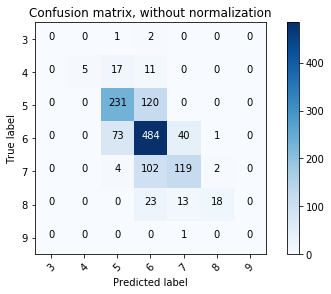

In [130]:
cnf_matrix = confusion_matrix( testY00,pred00)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names2,
                      title='Confusion matrix, without normalization')

Now I will take a look at the classifier when the outlier data is not removed and the data is normalized.

In [16]:
[sa1,testY1,pred1]=RFC(mixeddata_norm_out,featname3,labelname)


INFO: Number of possible iterations given cooling schedule: 200



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.6min finished


2 T: 100.00000, score: 0.637, std: 0.009, params: {'n_estimators': 2179, 'max_features': 9}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.5min finished


3 T: 100.00000, score: 0.634, std: 0.009, params: {'n_estimators': 2179, 'max_features': 13}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.3min finished


4 T: 100.00000, score: 0.637, std: 0.008, params: {'n_estimators': 2179, 'max_features': 7}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.2min finished


5 T: 100.00000, score: 0.639, std: 0.007, params: {'n_estimators': 2169, 'max_features': 7}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished


6 T: 100.00000, score: 0.636, std: 0.008, params: {'n_estimators': 2169, 'max_features': 9}


the best parameters are
(0.63954590709730608, {'n_estimators': 2179, 'max_features': 1})


C:\Program Files\Anaconda227\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



             precision    recall  f1-score   support

          3       0.00      0.00      0.00         9
          4       0.80      0.12      0.20        69
          5       0.69      0.74      0.71       613
          6       0.66      0.77      0.71       894
          7       0.70      0.51      0.59       315
          8       0.93      0.29      0.44        49
          9       0.00      0.00      0.00         1

avg / total       0.69      0.68      0.66      1950

the accuracy score is 0.677948717949
the mean absolute error is 0.35641025641
The MSE is 0.432307692308
here the feature scores


[(0.11185, 'alcohol'), (0.10007, 'density'), (0.09568, 'volatile acidity'), (0.09123, 'total sulfur dioxide'), (0.08877, 'chlorides'), (0.08646, 'free sulfur dioxide'), (0.08546, 'residual sugar'), (0.08481, 'sulphates'), (0.08435, 'citric acid'), (0.08359, 'pH'), (0.07911, 'fixed acidity'), (0.00435, 'color_white'), (0.00426, 'color_red')]


Confusion matrix, without normalization
[[  0   0   3   6   0   0   0]
 [  1   8  40  20   0   0   0]
 [  0   2 453 153   5   0   0]
 [  0   0 158 686  50   0   0]
 [  0   0   3 150 161   1   0]
 [  0   0   0  22  13  14   0]
 [  0   0   0   1   0   0   0]]


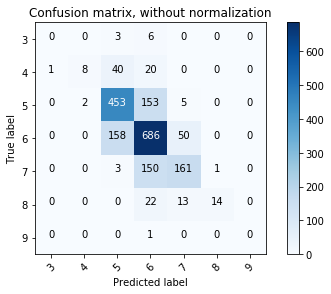

In [131]:
cnf_matrix = confusion_matrix( testY1,pred1)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names3,
                      title='Confusion matrix, without normalization')

I will now try SVM with a 'rbf' kernel for classification. The hyperparameters being tuned are gamma and C. C is the penalty of the error term and gamma is the kernel coefficient for the rbf. First classification will be done the the normalized data set that doesn't have outliers. 

In [18]:
def svmC(data, names, labelname):
    train, test = model_selection.train_test_split(data, train_size=0.7, random_state=42)
    trainX = np.array(train[names])
    testX = np.array(test[names])
    trainY = np.array(train[labelname])
    testY = np.array(test[labelname])

    svc_params = {'C': np.logspace(-8, 10, 30, base=2), 'gamma': np.logspace(-15, 10, 40, base=2)}

    # Using a linear SVM classifier
    clf = svm.SVC()
    # Initialize Simulated Annealing and fit
    print clf.get_params().keys()
    sa = SimulatedAnneal(clf, svc_params, T=100.0, T_min=0.001, alpha=0.75,
                         verbose=True, max_iter=0.25, n_trans=5, max_runtime=300,
                         cv=5, scoring='accuracy', refit=True)
    sa.fit(trainX, trainY)
    # Print the best score and the best params
    print "the best parameters are"
    print(sa.best_score_, sa.best_params_)
    # Use the best estimator to predict classes
    optimized_clf = sa.best_estimator_
    pred = optimized_clf.predict(testX)
    # Print a report of precision, recall, f1_score
    print(classification_report(testY, pred))
    print "the accuracy score is " + str(metrics.accuracy_score(testY, pred))
    print "the mean absolute error is " + str(metrics.mean_absolute_error(testY, pred))
    print "The MSE is " + str(metrics.mean_squared_error(testY, pred))

    return [sa, testY, pred]

In [125]:
[saSVM01,testYSVM1,predSVM1]=svmC(mixeddata_norm_out_ohe,featname3,labelname)

['kernel', 'C', 'verbose', 'probability', 'degree', 'shrinking', 'max_iter', 'decision_function_shape', 'random_state', 'tol', 'cache_size', 'coef0', 'gamma', 'class_weight']

INFO: Number of possible iterations given cooling schedule: 200



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


2 T: 100.00000, score: 0.456, std: 0.011, params: {'C': 0.02183458045557566, 'gamma': 7.4214019995575458e-05}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


3 T: 100.00000, score: 0.456, std: 0.011, params: {'C': 0.4436783947577595, 'gamma': 7.4214019995575458e-05}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished


4 T: 100.00000, score: 0.456, std: 0.011, params: {'C': 13.862383667332654, 'gamma': 7.4214019995575458e-05}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.0s finished


5 T: 100.00000, score: 0.529, std: 0.017, params: {'C': 13.862383667332654, 'gamma': 0.3442523627985678}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.0s finished


6 T: 100.00000, score: 0.554, std: 0.012, params: {'C': 281.68345829002442, 'gamma': 0.3442523627985678}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished


7 T: 75.00000, score: 0.503, std: 0.017, params: {'C': 1.0489642553230343, 'gamma': 0.3442523627985678}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s finished


8 T: 75.00000, score: 0.535, std: 0.013, params: {'C': 32.774065927967932, 'gamma': 0.3442523627985678}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s finished


9 T: 75.00000, score: 0.602, std: 0.022, params: {'C': 32.774065927967932, 'gamma': 45.658783373223834}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s finished


10 T: 75.00000, score: 0.563, std: 0.018, params: {'C': 0.4436783947577595, 'gamma': 45.658783373223834}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.5s finished


11 T: 75.00000, score: 0.538, std: 0.018, params: {'C': 0.4436783947577595, 'gamma': 111.03508438168626}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished


12 T: 56.25000, score: 0.525, std: 0.017, params: {'C': 0.4436783947577595, 'gamma': 2.0358637686747811}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


13 T: 56.25000, score: 0.456, std: 0.011, params: {'C': 0.4436783947577595, 'gamma': 0.00043889207675563584}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


14 T: 56.25000, score: 0.456, std: 0.011, params: {'C': 0.4436783947577595, 'gamma': 0.00028144257442609075}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


15 T: 56.25000, score: 0.456, std: 0.011, params: {'C': 0.4436783947577595, 'gamma': 4.7590252711929193e-05}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.7s finished


16 T: 56.25000, score: 0.561, std: 0.020, params: {'C': 0.4436783947577595, 'gamma': 71.202014470175314}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished


17 T: 42.18750, score: 0.456, std: 0.011, params: {'C': 0.4436783947577595, 'gamma': 0.058211011520450988}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


18 T: 42.18750, score: 0.456, std: 0.011, params: {'C': 1.0489642553230343, 'gamma': 0.058211011520450988}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


19 T: 42.18750, score: 0.456, std: 0.011, params: {'C': 0.0092353305249239688, 'gamma': 0.058211011520450988}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


20 T: 42.18750, score: 0.456, std: 0.011, params: {'C': 0.0092353305249239688, 'gamma': 2.0358637686747811}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


21 T: 42.18750, score: 0.514, std: 0.011, params: {'C': 0.28855066314649669, 'gamma': 2.0358637686747811}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


22 T: 31.64062, score: 0.497, std: 0.012, params: {'C': 0.28855066314649669, 'gamma': 0.83716838969366869}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.6s finished


23 T: 31.64062, score: 0.528, std: 0.021, params: {'C': 0.28855066314649669, 'gamma': 71.202014470175314}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s finished


24 T: 31.64062, score: 0.496, std: 0.021, params: {'C': 0.28855066314649669, 'gamma': 111.03508438168626}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished


25 T: 31.64062, score: 0.456, std: 0.011, params: {'C': 0.28855066314649669, 'gamma': 0.037328213038997853}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


26 T: 31.64062, score: 0.456, std: 0.011, params: {'C': 0.00390625, 'gamma': 0.037328213038997853}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished


27 T: 23.73047, score: 0.456, std: 0.011, params: {'C': 0.00390625, 'gamma': 71.202014470175314}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished


28 T: 23.73047, score: 0.456, std: 0.011, params: {'C': 0.00390625, 'gamma': 0.83716838969366869}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished


29 T: 23.73047, score: 0.456, std: 0.011, params: {'C': 0.00390625, 'gamma': 0.00011573211844960591}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


30 T: 23.73047, score: 0.456, std: 0.011, params: {'C': 32.774065927967932, 'gamma': 0.00011573211844960591}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


31 T: 23.73047, score: 0.456, std: 0.011, params: {'C': 281.68345829002442, 'gamma': 0.00011573211844960591}
32 T: 17.79785, score: 0.456, std: 0.011, params: {'C': 0.00390625, 'gamma': 0.00011573211844960591}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


33 T: 17.79785, score: 0.456, std: 0.011, params: {'C': 0.68220435132003743, 'gamma': 0.00011573211844960591}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s finished


34 T: 17.79785, score: 0.586, std: 0.011, params: {'C': 0.68220435132003743, 'gamma': 45.658783373223834}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished


35 T: 17.79785, score: 0.456, std: 0.011, params: {'C': 0.68220435132003743, 'gamma': 0.023936974333374616}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


36 T: 17.79785, score: 0.456, std: 0.011, params: {'C': 0.68220435132003743, 'gamma': 7.4214019995575458e-05}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


37 T: 13.34839, score: 0.456, std: 0.011, params: {'C': 1.6128979635153653, 'gamma': 7.4214019995575458e-05}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


38 T: 13.34839, score: 0.456, std: 0.011, params: {'C': 1.0489642553230343, 'gamma': 7.4214019995575458e-05}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s finished


39 T: 13.34839, score: 0.618, std: 0.013, params: {'C': 1.0489642553230343, 'gamma': 173.15226339294699}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished


40 T: 13.34839, score: 0.456, std: 0.011, params: {'C': 0.00390625, 'gamma': 173.15226339294699}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished


41 T: 13.34839, score: 0.456, std: 0.011, params: {'C': 0.00390625, 'gamma': 0.006311977125113854}
42 T: 10.01129, score: 0.456, std: 0.011, params: {'C': 0.00390625, 'gamma': 0.037328213038997853}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished


43 T: 10.01129, score: 0.505, std: 0.016, params: {'C': 13.862383667332654, 'gamma': 0.037328213038997853}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s finished


44 T: 10.01129, score: 0.580, std: 0.010, params: {'C': 13.862383667332654, 'gamma': 12.039833948875184}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


45 T: 10.01129, score: 0.456, std: 0.011, params: {'C': 13.862383667332654, 'gamma': 0.0010673175055644216}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.5s finished


46 T: 10.01129, score: 0.599, std: 0.012, params: {'C': 13.862383667332654, 'gamma': 1024.0}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished


47 T: 7.50847, score: 0.535, std: 0.014, params: {'C': 13.862383667332654, 'gamma': 0.53684000988406}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished


48 T: 7.50847, score: 0.529, std: 0.015, params: {'C': 9.0155392898586566, 'gamma': 0.53684000988406}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished


49 T: 7.50847, score: 0.564, std: 0.007, params: {'C': 9.0155392898586566, 'gamma': 4.9509051412217202}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s finished


50 T: 7.50847, score: 0.456, std: 0.011, params: {'C': 9.0155392898586566, 'gamma': 0.006311977125113854}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished


51 T: 7.50847, score: 0.456, std: 0.011, params: {'C': 0.1876617977932919, 'gamma': 0.006311977125113854}


the best parameters are
(0.61781410421864691, {'C': 1.0489642553230343, 'gamma': 173.15226339294699})


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       1.00      0.12      0.22        33
          5       0.79      0.53      0.63       351
          6       0.59      0.89      0.71       598
          7       0.80      0.38      0.51       227
          8       0.94      0.28      0.43        54
          9       0.00      0.00      0.00         1

avg / total       0.71      0.65      0.63      1267

the accuracy score is 0.651144435675
the mean absolute error is 0.403314917127
The MSE is 0.518547750592


Confusion matrix, without normalization
[[  0   0   0   3   0   0   0]
 [  0   4   2  27   0   0   0]
 [  0   0 186 165   0   0   0]
 [  0   0  47 534  16   1   0]
 [  0   0   0 141  86   0   0]
 [  0   0   0  33   6  15   0]
 [  0   0   0   1   0   0   0]]


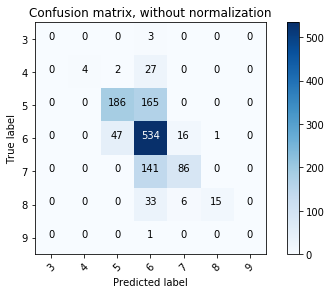

In [127]:
cnf_matrix = confusion_matrix(testYSVM1,predSVM1)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names2,
                      title='Confusion matrix, without normalization')

Now I will run it on the data set with  outliers and is normalized.

In [61]:
[saSVM2,testYSVM2,predSVM2]=svmC(mixeddata_norm_out,featname3,labelname)

['kernel', 'C', 'verbose', 'probability', 'degree', 'shrinking', 'max_iter', 'decision_function_shape', 'random_state', 'tol', 'cache_size', 'coef0', 'gamma', 'class_weight']

INFO: Number of possible iterations given cooling schedule: 200



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.4s finished


2 T: 100.00000, score: 0.561, std: 0.013, params: {'C': 433.1193116699996, 'gamma': 1.3055116977098116}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.0s finished


3 T: 100.00000, score: 0.534, std: 0.013, params: {'C': 433.1193116699996, 'gamma': 0.00043889207675563584}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.1s finished


4 T: 100.00000, score: 0.568, std: 0.018, params: {'C': 433.1193116699996, 'gamma': 656.64706991914693}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.9s finished


5 T: 100.00000, score: 0.568, std: 0.018, params: {'C': 665.96859922227532, 'gamma': 656.64706991914693}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.4s finished


6 T: 100.00000, score: 0.560, std: 0.010, params: {'C': 665.96859922227532, 'gamma': 1.3055116977098116}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.9s finished


7 T: 75.00000, score: 0.547, std: 0.019, params: {'C': 665.96859922227532, 'gamma': 0.058211011520450988}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.5s finished


8 T: 75.00000, score: 0.504, std: 0.010, params: {'C': 665.96859922227532, 'gamma': 3.0517578125e-05}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.8s finished


9 T: 75.00000, score: 0.427, std: 0.012, params: {'C': 0.12204771933977775, 'gamma': 3.0517578125e-05}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.5s finished


10 T: 75.00000, score: 0.427, std: 0.012, params: {'C': 0.12204771933977775, 'gamma': 4.7590252711929193e-05}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.0s finished


11 T: 75.00000, score: 0.427, std: 0.012, params: {'C': 0.12204771933977775, 'gamma': 173.15226339294699}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.2s finished


12 T: 56.25000, score: 0.597, std: 0.012, params: {'C': 3.8132853237865367, 'gamma': 173.15226339294699}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.4s finished


13 T: 56.25000, score: 0.427, std: 0.012, params: {'C': 0.05162228924935329, 'gamma': 173.15226339294699}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.7s finished


14 T: 56.25000, score: 0.599, std: 0.014, params: {'C': 281.68345829002442, 'gamma': 173.15226339294699}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.8s finished


15 T: 56.25000, score: 0.589, std: 0.014, params: {'C': 1.0489642553230343, 'gamma': 173.15226339294699}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.4s finished


16 T: 56.25000, score: 0.572, std: 0.022, params: {'C': 1.0489642553230343, 'gamma': 12.039833948875184}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.0s finished


17 T: 42.18750, score: 0.581, std: 0.008, params: {'C': 3.8132853237865367, 'gamma': 12.039833948875184}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.2s finished


18 T: 42.18750, score: 0.571, std: 0.016, params: {'C': 281.68345829002442, 'gamma': 12.039833948875184}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished


19 T: 42.18750, score: 0.427, std: 0.012, params: {'C': 0.00390625, 'gamma': 12.039833948875184}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.8s finished


20 T: 42.18750, score: 0.427, std: 0.012, params: {'C': 0.00390625, 'gamma': 0.00011573211844960591}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.7s finished


21 T: 42.18750, score: 0.427, std: 0.012, params: {'C': 0.00390625, 'gamma': 421.07946722011718}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.7s finished


22 T: 31.64062, score: 0.427, std: 0.012, params: {'C': 0.00390625, 'gamma': 0.006311977125113854}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s finished


23 T: 31.64062, score: 0.427, std: 0.012, params: {'C': 0.00390625, 'gamma': 3.0517578125e-05}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.4s finished


24 T: 31.64062, score: 0.427, std: 0.012, params: {'C': 0.00390625, 'gamma': 111.03508438168626}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.4s finished


25 T: 31.64062, score: 0.606, std: 0.013, params: {'C': 2.480008091325173, 'gamma': 111.03508438168626}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.2s finished


26 T: 31.64062, score: 0.427, std: 0.012, params: {'C': 0.02183458045557566, 'gamma': 111.03508438168626}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.0s finished


27 T: 23.73047, score: 0.609, std: 0.013, params: {'C': 32.774065927967932, 'gamma': 111.03508438168626}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.3s finished


28 T: 23.73047, score: 0.538, std: 0.015, params: {'C': 32.774065927967932, 'gamma': 0.015349750057363503}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.5s finished


29 T: 23.73047, score: 0.454, std: 0.010, params: {'C': 0.28855066314649669, 'gamma': 0.015349750057363503}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.0s finished


30 T: 23.73047, score: 0.553, std: 0.021, params: {'C': 0.28855066314649669, 'gamma': 29.279010076269941}


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.7s finished


31 T: 23.73047, score: 0.427, std: 0.012, params: {'C': 0.0092353305249239688, 'gamma': 29.279010076269941}


the best parameters are
(0.60897883194912894, {'C': 32.774065927967932, 'gamma': 111.03508438168626})


             precision    recall  f1-score   support

          3       0.00      0.00      0.00         9
          4       0.64      0.13      0.22        69
          5       0.69      0.58      0.63       613
          6       0.60      0.80      0.69       894
          7       0.73      0.49      0.58       315
          8       0.83      0.31      0.45        49
          9       0.00      0.00      0.00         1

avg / total       0.65      0.64      0.63      1950

the accuracy score is 0.641538461538
the mean absolute error is 0.412307692308
The MSE is 0.530256410256


Confusion matrix, without normalization
[[  0   0   0   9   0   0   0]
 [  0   9  20  40   0   0   0]
 [  0   2 357 250   4   0   0]
 [  0   3 130 717  44   0   0]
 [  0   0  14 145 153   3   0]
 [  0   0   0  24  10  15   0]
 [  0   0   0   1   0   0   0]]


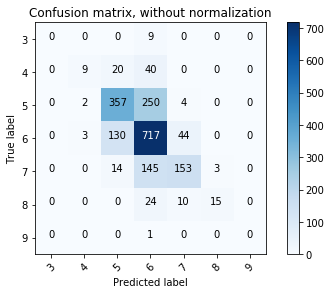

In [62]:
cnf_matrix = confusion_matrix( testYSVM2,predSVM2)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names3,
                      title='Confusion matrix, without normalization')

__Best Features__

In the previous section, when I ran the random forest classifiers, I also calculated the feature scores.
The scores obtained from the  random forest classifer on the normalized data was:



[(0.12098, 'alcohol'), (0.10039, 'density'), (0.09956, 'volatile acidity'), (0.09049, 'total sulfur dioxide'), (0.08683, 'chlorides'), (0.08558, 'free sulfur dioxide'), (0.08464, 'residual sugar'), (0.08329, 'sulphates'), (0.08241, 'pH'), (0.08125, 'citric acid'), (0.07591, 'fixed acidity'), (0.0044, 'color_white'), (0.00427, 'color_red')]

While the scores obtained from the random forest classifer on the normalized and trimmed data was:
[(0.11431, 'alcohol'), (0.10171, 'density'), (0.09536, 'volatile acidity'), (0.09448, 'total sulfur dioxide'), (0.09353, 'free sulfur dioxide'), (0.08896, 'residual sugar'), (0.08651, 'pH'), (0.08543, 'chlorides'), (0.08406, 'citric acid'), (0.07935, 'sulphates'), (0.07498, 'fixed acidity'), (0.00066, 'color_white'), (0.00065, 'color_red')]

It seems as though color did not matter at all, while everything else has some effect on the quality. Alcohol, density,volatile acidity, and total sulfur dioxide had the top 4 scores, so they are the top 4 factors affecting quality. One caveat of
these scorings is that a feature with more categories will have a heavier weighting. Also if there are 2 correlated features, when one of those correlated features is used then the score of the other feature will appear lower, even if it is actually a strong feature. 



__Unsupervised Learning Analysis__

Here I will used clustering methods to analyze and label the data. I will look for what patterns the clusters can discern and if they match the classification algorithms.

In [134]:
mixedfeatures_norm_ohe=mixeddata_norm_out_ohe0

In [83]:
from sklearn.cluster import KMeans

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

The elbow method is a heuristic for finding the optimal number of clusters. It plots the number of clusters vs the percentage of variance explained. At the elbow you find the optimal number of clusters.

Text(0,0.5,u'variance explained')

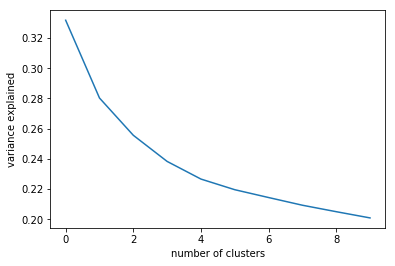

In [132]:
from scipy import cluster

init = [cluster.vq.kmeans(mixedfeatures_norm_ohe,i) for i in range(1,11)]
plt.plot([variance for (c,variance) in init])
plt.xlabel('number of clusters')
plt.ylabel('variance explained')

Using the elbow method for the normalized data, the elbow seems unclear. 2-4 clusters seem ideal.

Now I will run the elbow method on the normalized data with the outliers plucked.

Text(0,0.5,u'variance explained')

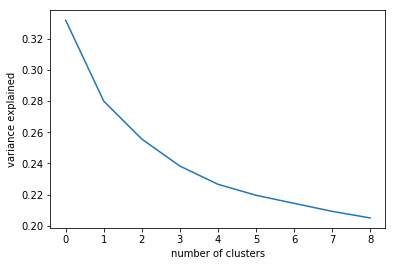

In [133]:
init = [cluster.vq.kmeans(mixeddata_norm_out_ohe[featname3],i) for i in range(1,10)]
plt.plot([variance for (c,variance) in init])
plt.xlabel('number of clusters')
plt.ylabel('variance explained')

The result isn't as clear from this. Next I will try the silhouette method; the higher the score the better the clustering is supposed to be.
We want to see how similar a data point is to other points in its cluser,
when compared to the points of the other clusters. That
is what the silhouette value does. It has values that range
from -1 to 1.
If the score is closer to 1, then the data point is more similar to the points in its cluster and more
different than points outside its cluster

In [86]:
#function modified but from sklearn docs
def silhoutte_analysis(X,range_n_clusters):
 for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

('For n_clusters =', 2, 'The average silhouette_score is :', 0.68481355685411505)


('For n_clusters =', 3, 'The average silhouette_score is :', 0.3391557129926101)


('For n_clusters =', 4, 'The average silhouette_score is :', 0.24578419318476064)


('For n_clusters =', 5, 'The average silhouette_score is :', 0.20491642621124759)


('For n_clusters =', 6, 'The average silhouette_score is :', 0.18915479599664423)


('For n_clusters =', 7, 'The average silhouette_score is :', 0.18081027086420717)


('For n_clusters =', 8, 'The average silhouette_score is :', 0.17992667965681153)


('For n_clusters =', 9, 'The average silhouette_score is :', 0.17898047395950975)


('For n_clusters =', 10, 'The average silhouette_score is :', 0.17597941568414729)


('For n_clusters =', 11, 'The average silhouette_score is :', 0.16610119901389145)


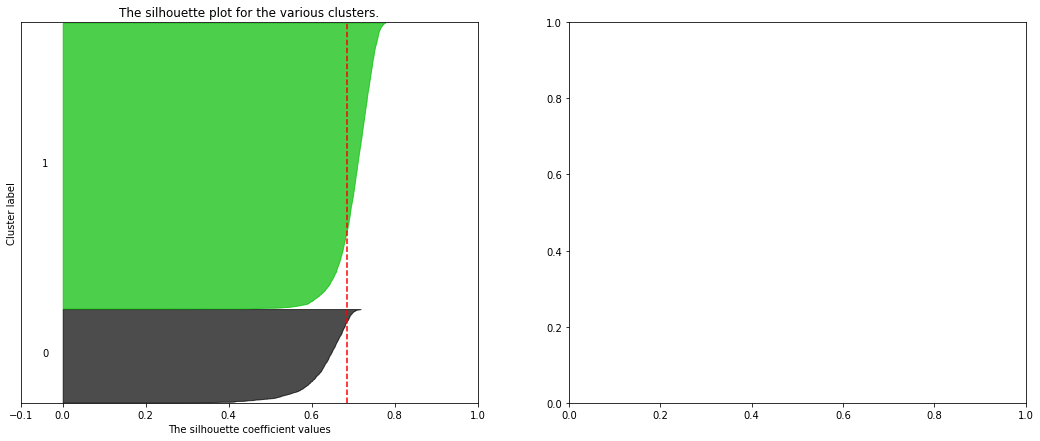

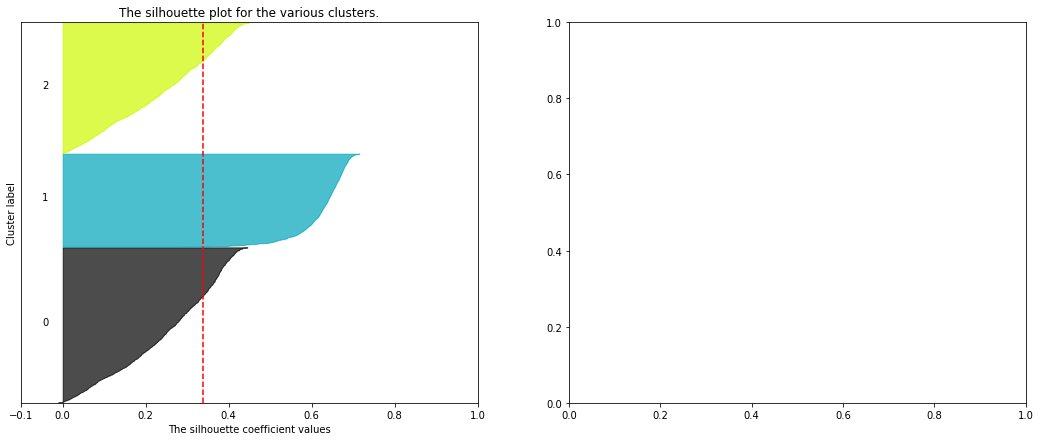

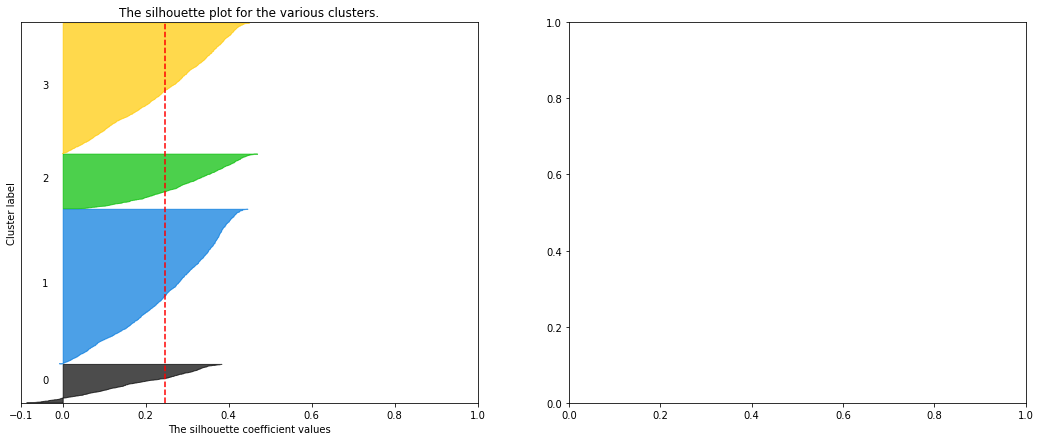

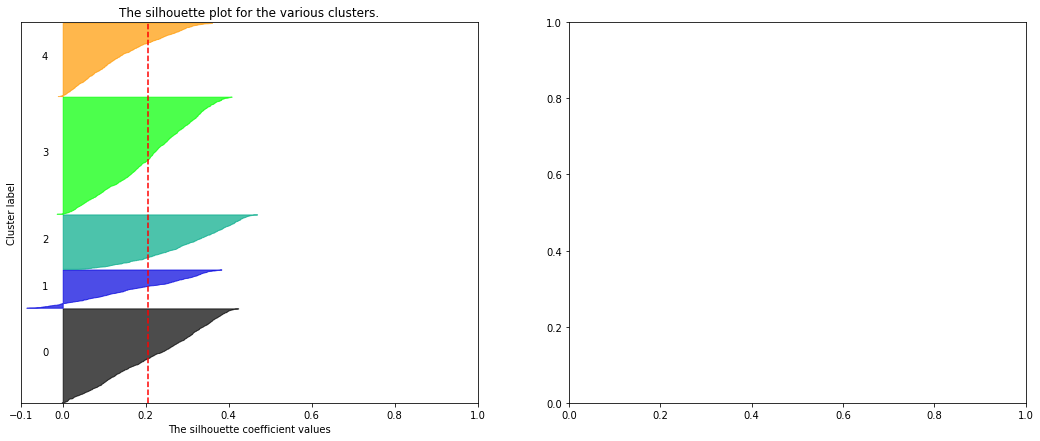

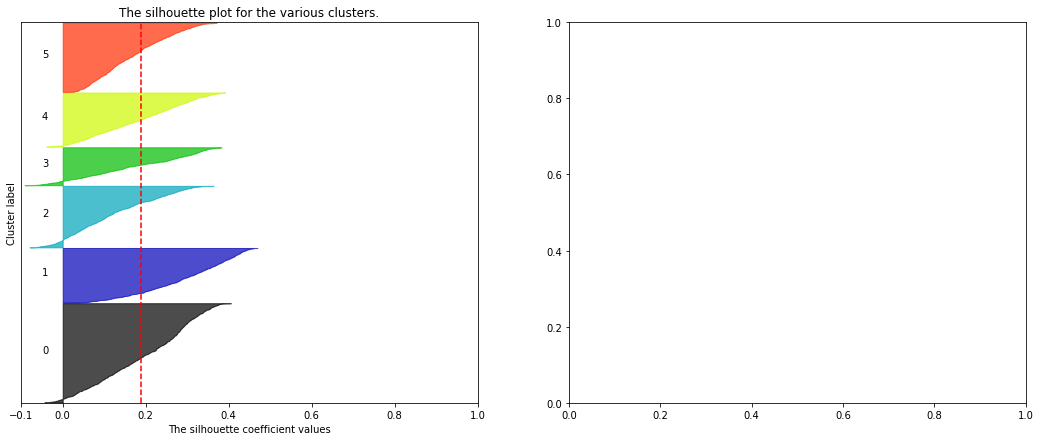

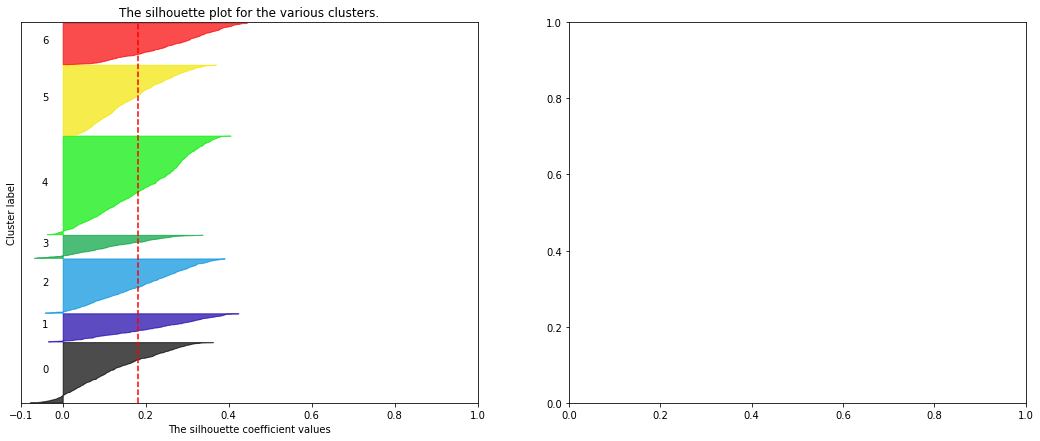

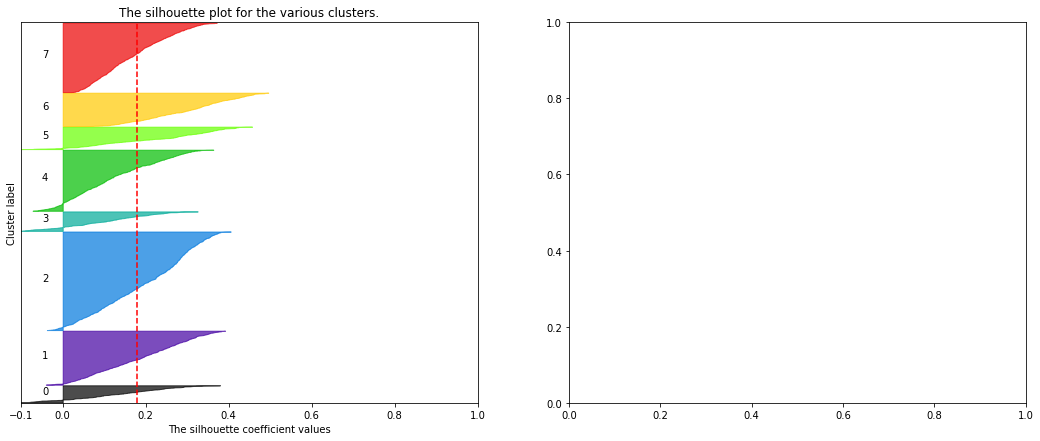

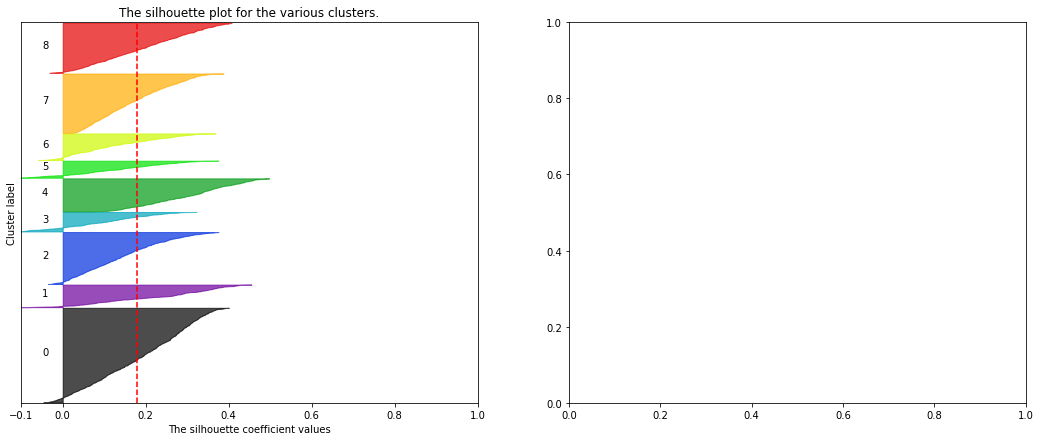

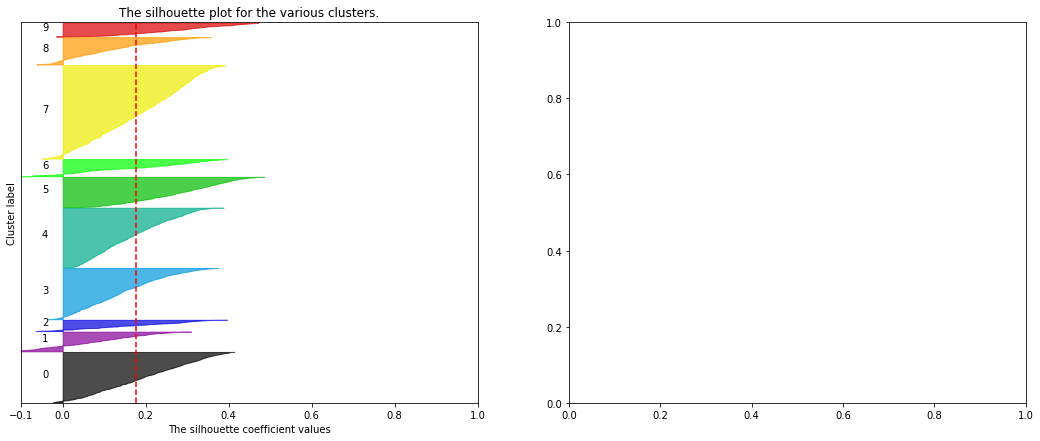

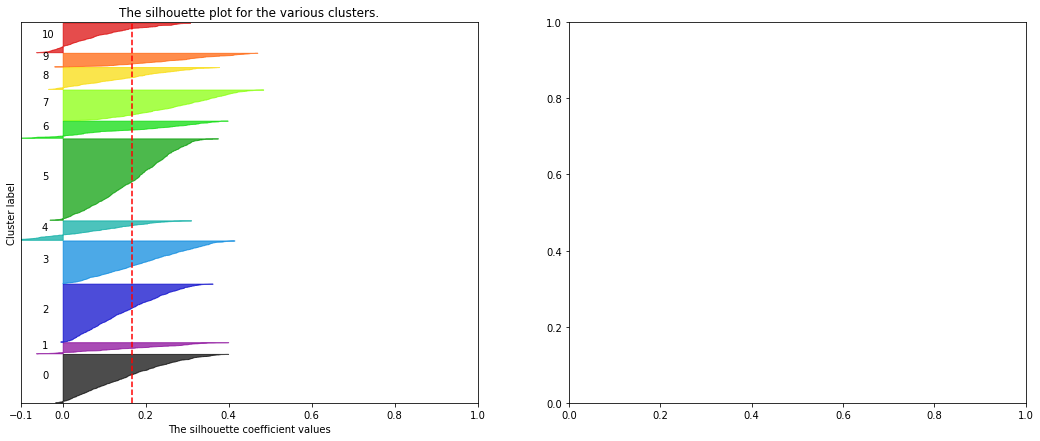

In [87]:
nclus=list(np.arange(2,12,1))
silhoutte_analysis(mixeddata_norm_ohe[featname3],nclus)

This also seems to indicate that the optimal clustering is at 2 clusters. Now this method will be tried on the normalized
data where outliers are plucked.

('For n_clusters =', 2, 'The average silhouette_score is :', 0.68481355685411505)


('For n_clusters =', 3, 'The average silhouette_score is :', 0.3391557129926101)


('For n_clusters =', 4, 'The average silhouette_score is :', 0.24578419318476064)


('For n_clusters =', 5, 'The average silhouette_score is :', 0.20491642621124759)


('For n_clusters =', 6, 'The average silhouette_score is :', 0.18915479599664423)


('For n_clusters =', 7, 'The average silhouette_score is :', 0.18081027086420717)


('For n_clusters =', 8, 'The average silhouette_score is :', 0.17992667965681153)


('For n_clusters =', 9, 'The average silhouette_score is :', 0.17898047395950975)


('For n_clusters =', 10, 'The average silhouette_score is :', 0.17597941568414729)


('For n_clusters =', 11, 'The average silhouette_score is :', 0.16610119901389145)


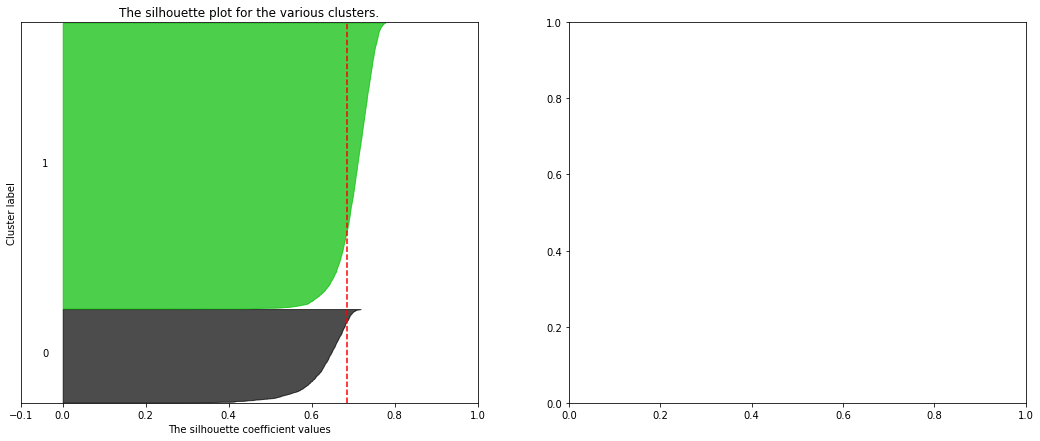

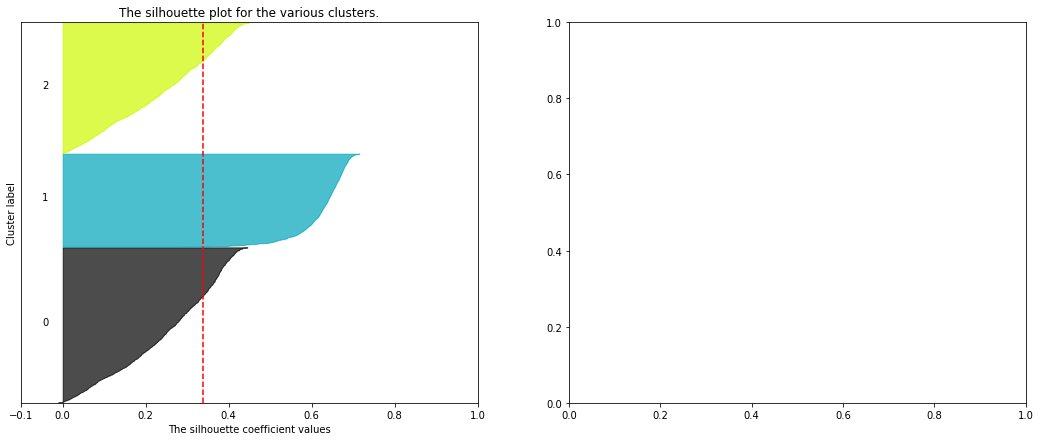

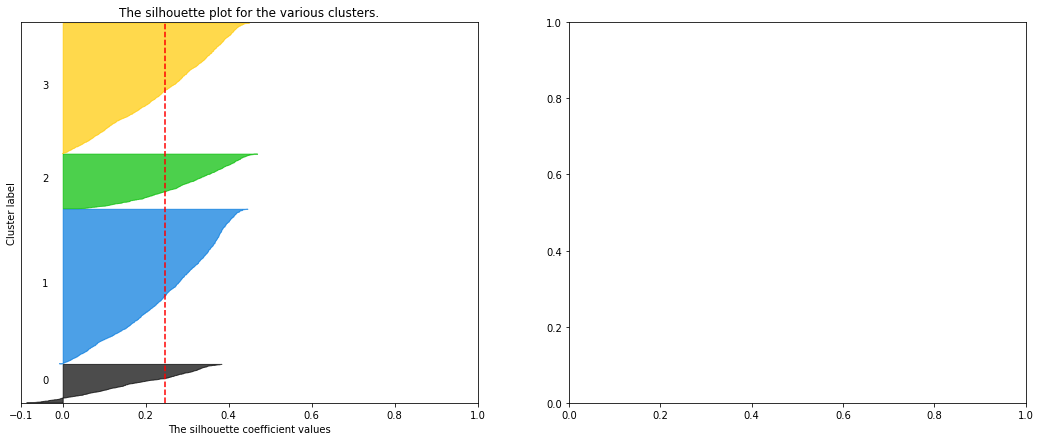

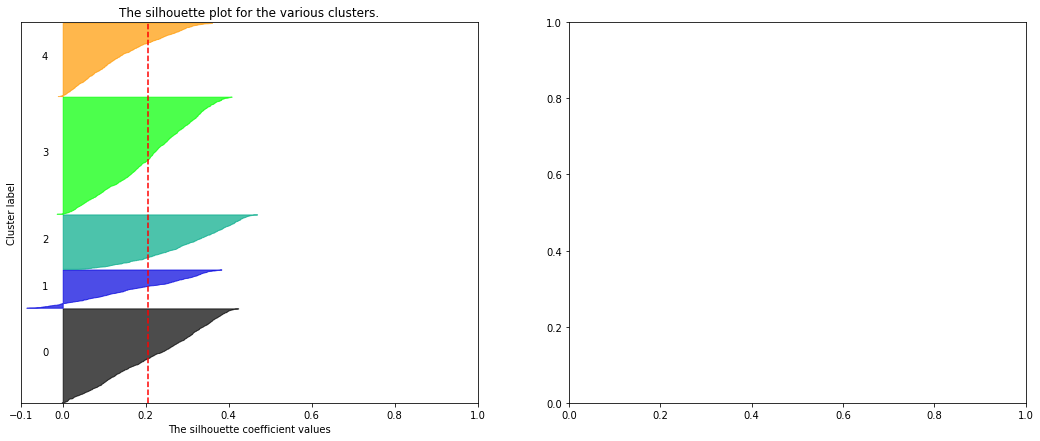

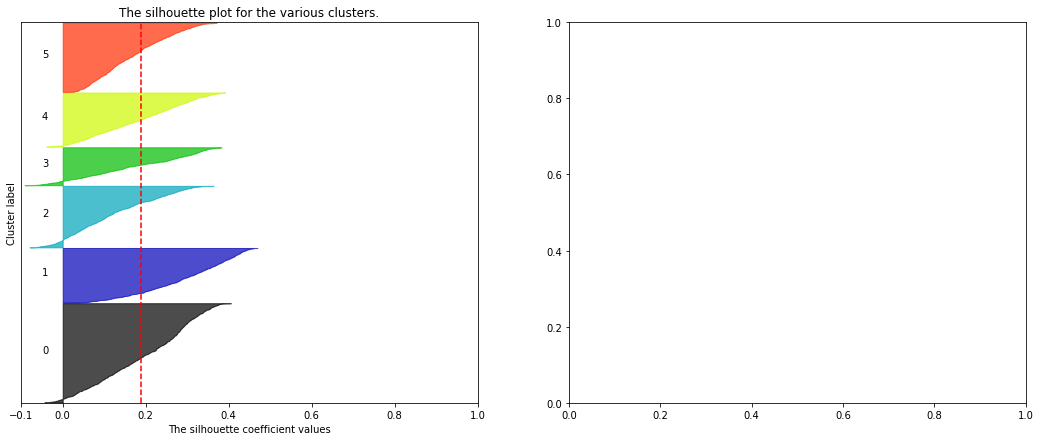

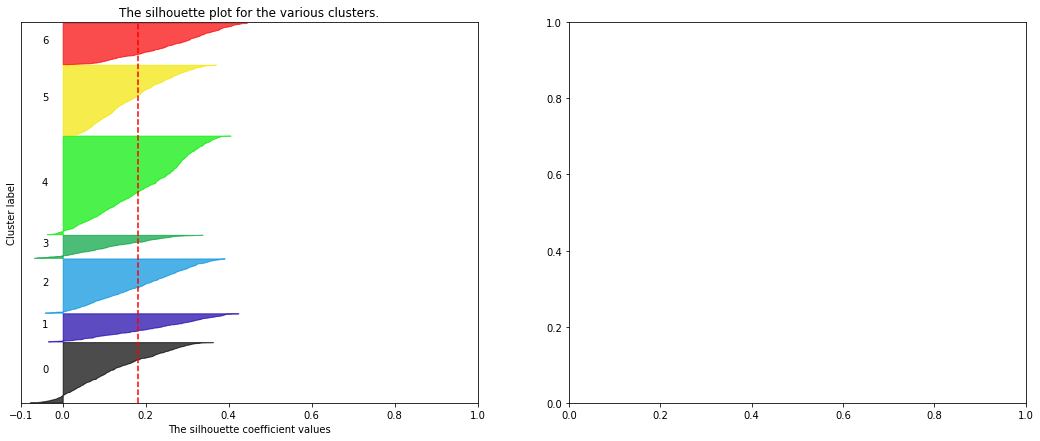

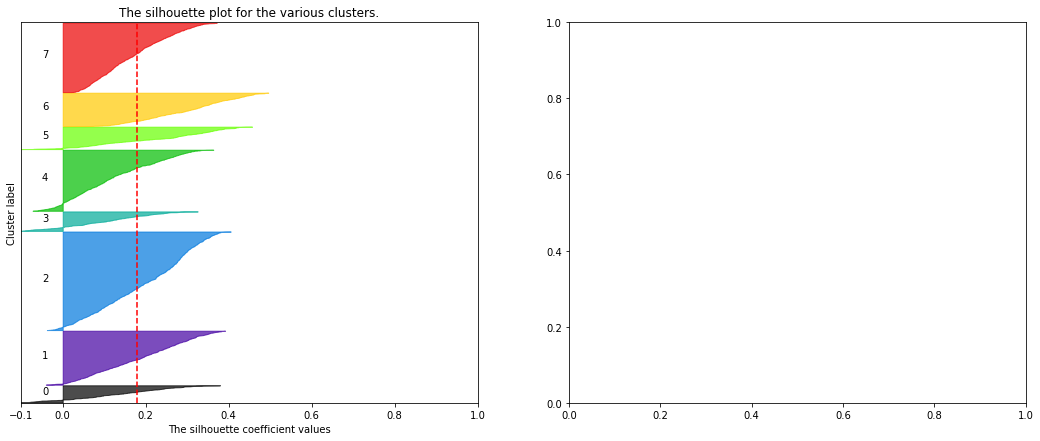

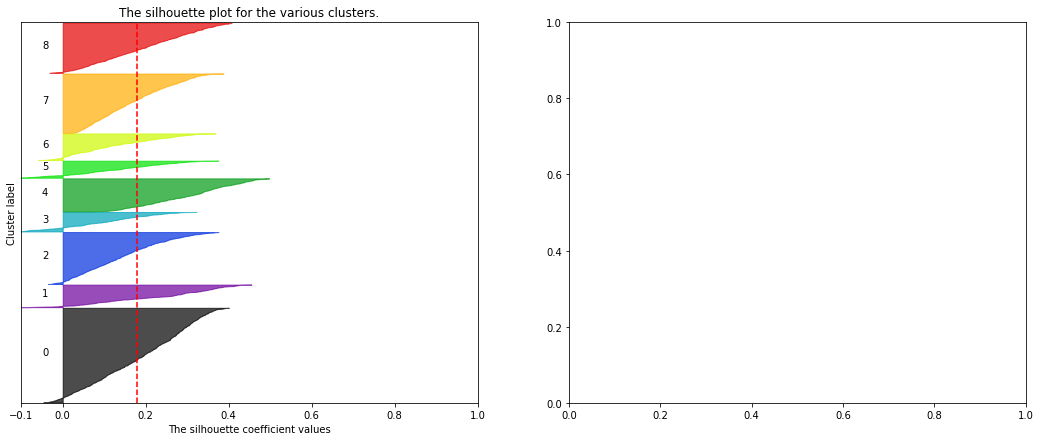

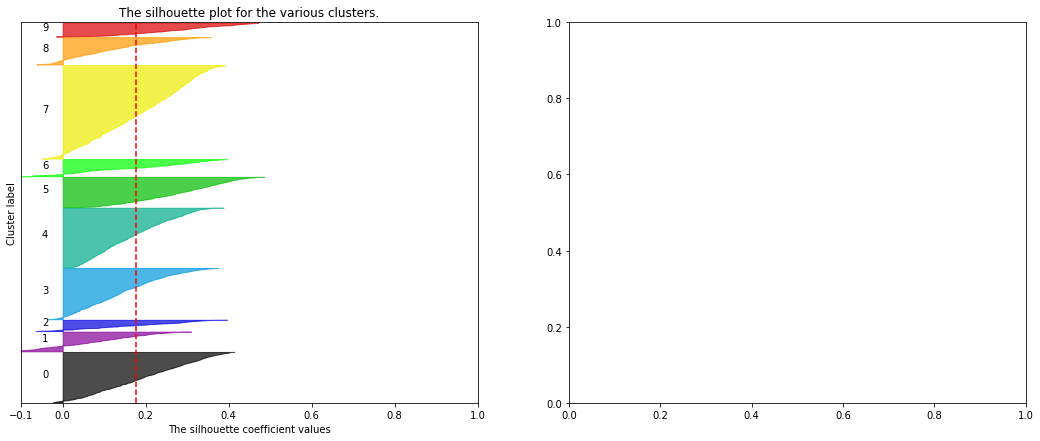

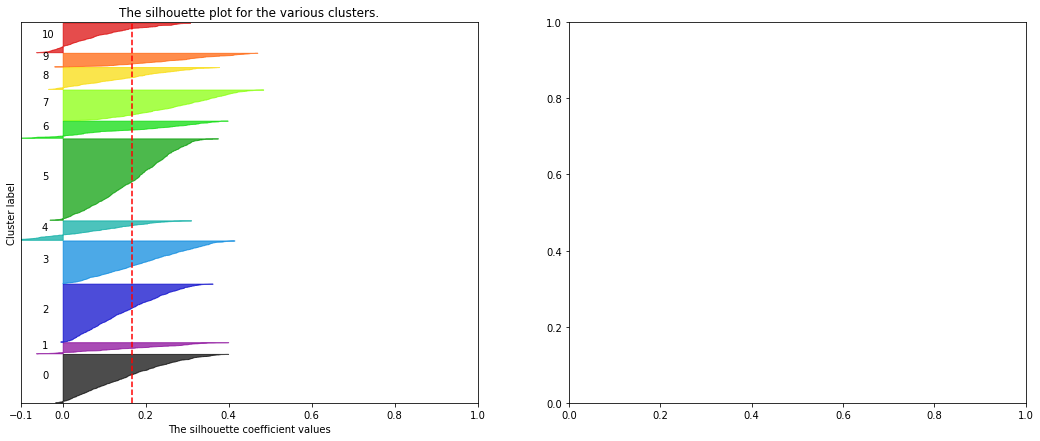

In [163]:
silhoutte_analysis(mixeddata_norm_out_ohe[featname3],nclus)

Same results here.However since I want to compare K-Means with the classification methods,I will use K=7.

In [88]:
clusterlabels=KMeans(n_clusters=7).fit_predict(mixeddata_norm_out_ohe[featname3])

In [89]:
print clusterlabels
print type(clusterlabels)

[2 2 2 ..., 1 3 3]
<type 'numpy.ndarray'>


I will now plot how the labels are distributed.

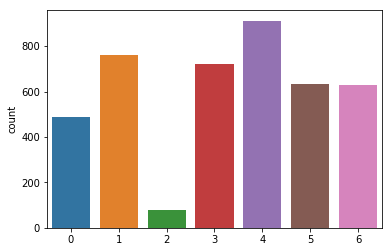

In [90]:
sns.countplot(x=clusterlabels)

In [91]:
#unique label names
clusLabelnames= sorted(list(set(clusterlabels)))
d=[]

In [92]:
#array of arrays, where the inner array has the locations of a cluster label 
for i in clusLabelnames:
    a=list((np.where(clusterlabels==i)))
    d.append(a[0])

In [93]:
label0= mixeddata_norm_out_ohe.iloc[d[0],:]
label1=mixeddata_norm_out_ohe.iloc[d[1],:]
label2=label1=mixeddata_norm_out_ohe.iloc[d[2],:]

label3=label1=mixeddata_norm_out_ohe.iloc[d[3],:]

label4= mixeddata_norm_out_ohe.iloc[d[4],:]
label5=mixeddata_norm_out_ohe.iloc[d[5],:]
label6=label1=mixeddata_norm_out_ohe.iloc[d[6],:]

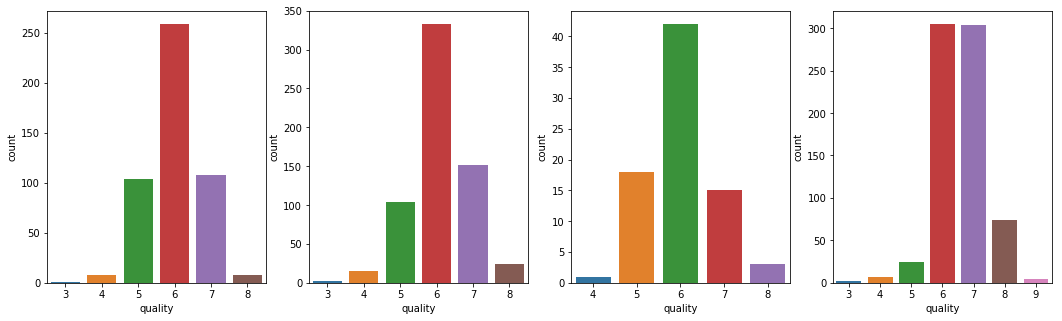

In [94]:
fig, axs = plt.subplots(ncols=4,figsize=(18,5))
sns.countplot(x='quality',data=label0,ax=axs[0])

sns.countplot(x='quality',data=label1,ax=axs[1])

sns.countplot(x='quality',data=label2,ax=axs[2])

sns.countplot(x='quality',data=label3,ax=axs[3])

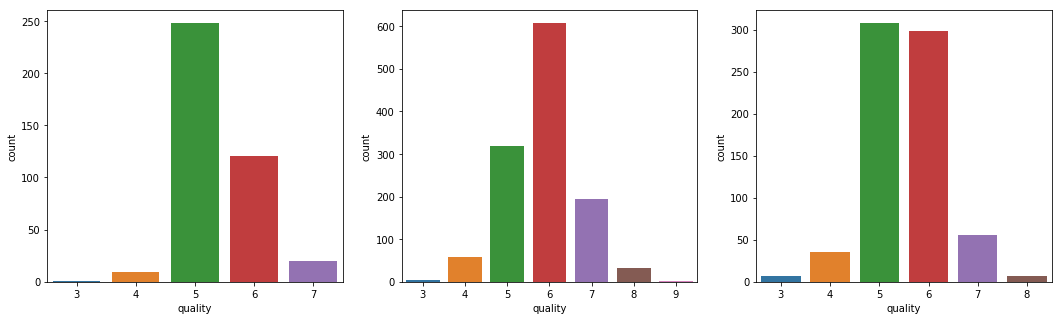

In [47]:
fig, axs = plt.subplots(ncols=3,figsize=(18,5))
sns.countplot(x='quality',data=label4,ax=axs[0])

sns.countplot(x='quality',data=label5,ax=axs[1])

sns.countplot(x='quality',data=label6,ax=axs[2])

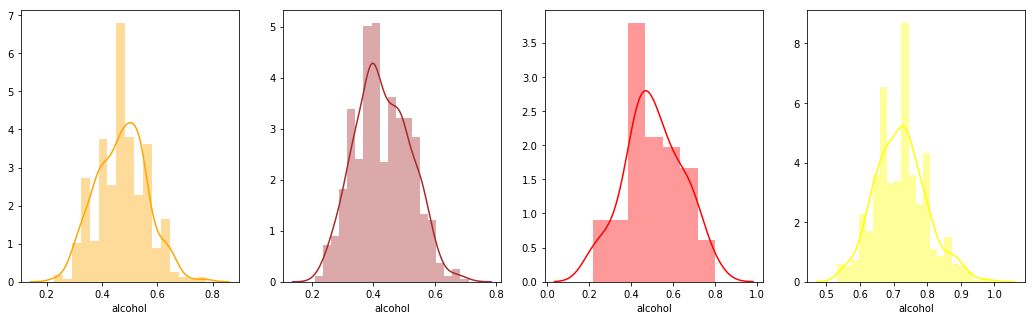

In [96]:
fig, axs = plt.subplots(ncols=4,figsize=(18,5))

sns.distplot(label0['alcohol'],ax=axs[0],color='orange')

sns.distplot(label1['alcohol'],ax=axs[1],color='brown')

sns.distplot(label2['alcohol'],ax=axs[2],color='red')

sns.distplot(label3['alcohol'],ax=axs[3],color='yellow')

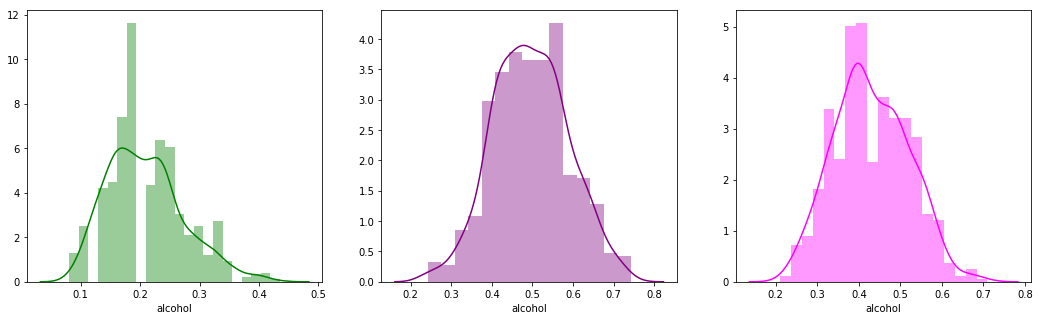

In [97]:
fig, axs = plt.subplots(ncols=3,figsize=(18,5))
sns.distplot(label4['alcohol'],ax=axs[0],color='green')

sns.distplot(label5['alcohol'],ax=axs[1],color='purple')

sns.distplot(label6['alcohol'],ax=axs[2],color='magenta')

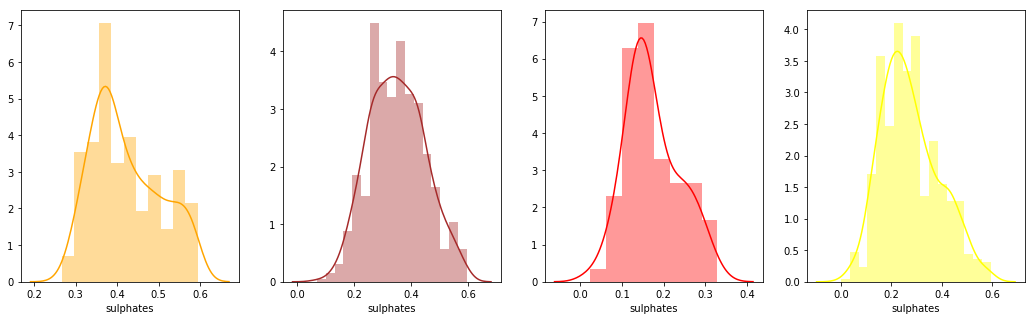

In [98]:
fig, axs = plt.subplots(ncols=4,figsize=(18,5))

sns.distplot(label0['sulphates'],ax=axs[0],color='orange')

sns.distplot(label1['sulphates'],ax=axs[1],color='brown')

sns.distplot(label2['sulphates'],ax=axs[2],color='red')

sns.distplot(label3['sulphates'],ax=axs[3],color='yellow')

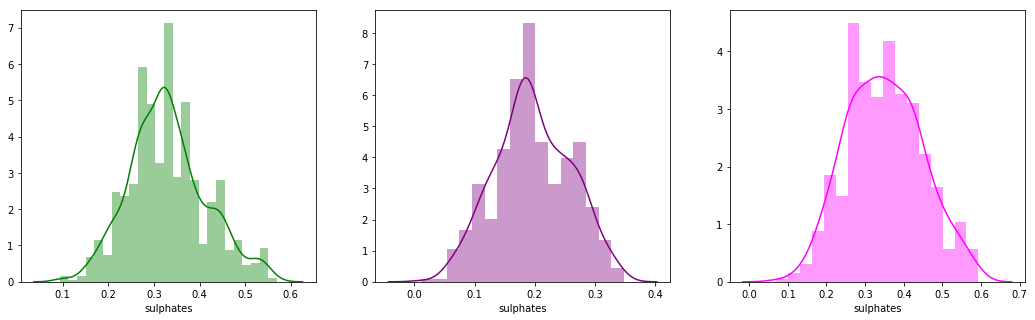

In [99]:
fig, axs = plt.subplots(ncols=3,figsize=(18,5))
sns.distplot(label4['sulphates'],ax=axs[0],color='green')

sns.distplot(label5['sulphates'],ax=axs[1],color='purple')

sns.distplot(label6['sulphates'],ax=axs[2],color='magenta')

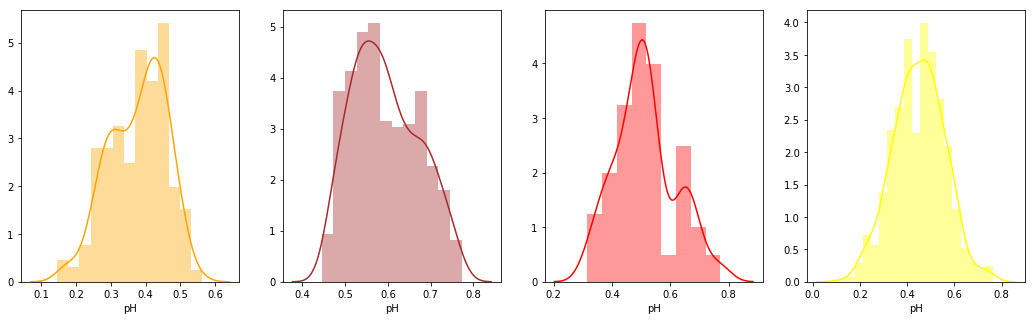

In [100]:
fig, axs = plt.subplots(ncols=4,figsize=(18,5))

sns.distplot(label0['pH'],ax=axs[0],color='orange')

sns.distplot(label1['pH'],ax=axs[1],color='brown')

sns.distplot(label2['pH'],ax=axs[2],color='red')

sns.distplot(label3['pH'],ax=axs[3],color='yellow')

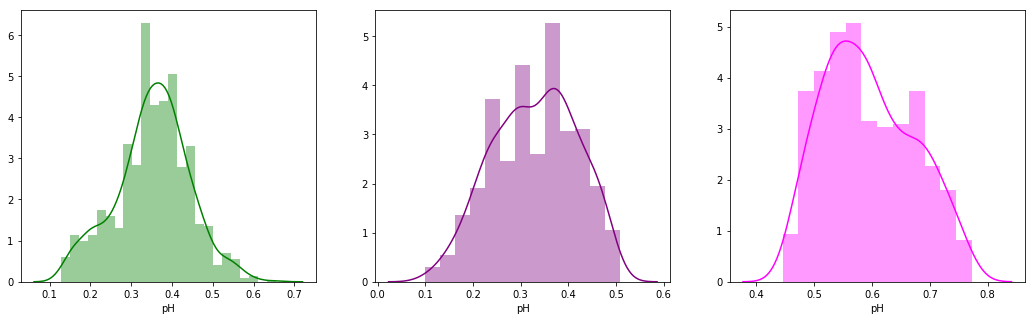

In [101]:
fig, axs = plt.subplots(ncols=3,figsize=(18,5))
sns.distplot(label4['pH'],ax=axs[0],color='green')

sns.distplot(label5['pH'],ax=axs[1],color='purple')

sns.distplot(label6['pH'],ax=axs[2],color='magenta')

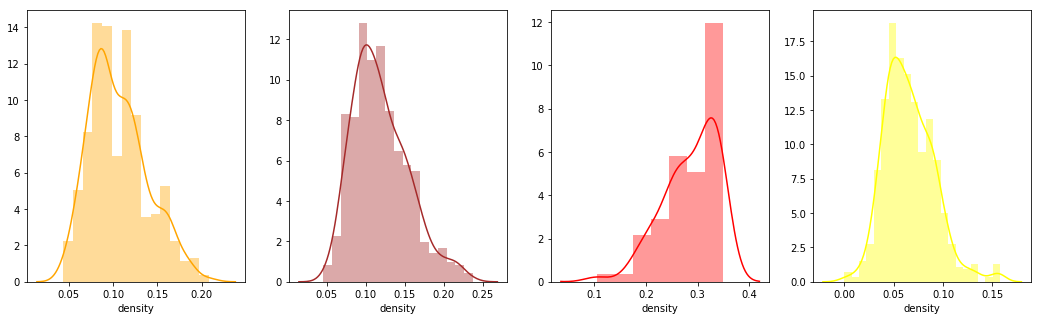

In [102]:
fig, axs = plt.subplots(ncols=4,figsize=(18,5))

sns.distplot(label0['density'],ax=axs[0],color='orange')

sns.distplot(label1['density'],ax=axs[1],color='brown')

sns.distplot(label2['density'],ax=axs[2],color='red')

sns.distplot(label3['density'],ax=axs[3],color='yellow')

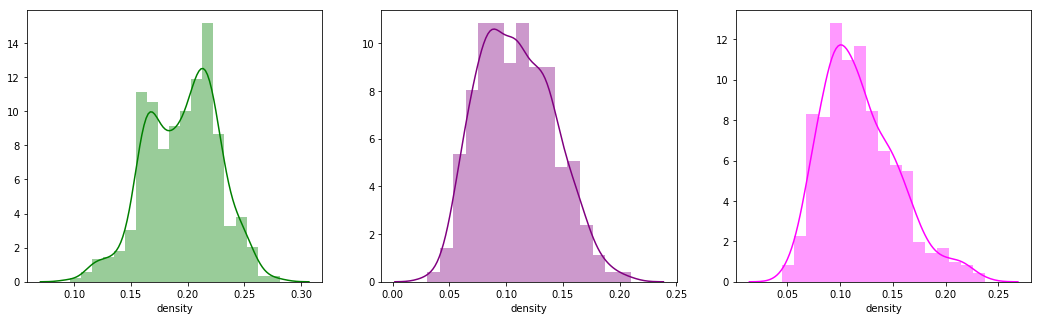

In [103]:
fig, axs = plt.subplots(ncols=3,figsize=(18,5))
sns.distplot(label4['density'],ax=axs[0],color='green')

sns.distplot(label5['density'],ax=axs[1],color='purple')

sns.distplot(label6['density'],ax=axs[2],color='magenta')

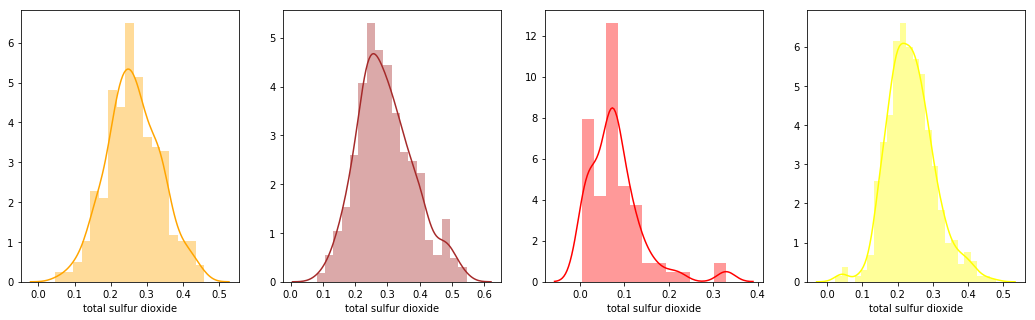

In [104]:
fig, axs = plt.subplots(ncols=4,figsize=(18,5))

sns.distplot(label0["total sulfur dioxide"],ax=axs[0],color='orange')

sns.distplot(label1["total sulfur dioxide"],ax=axs[1],color='brown')

sns.distplot(label2["total sulfur dioxide"],ax=axs[2],color='red')

sns.distplot(label3["total sulfur dioxide"],ax=axs[3],color='yellow')

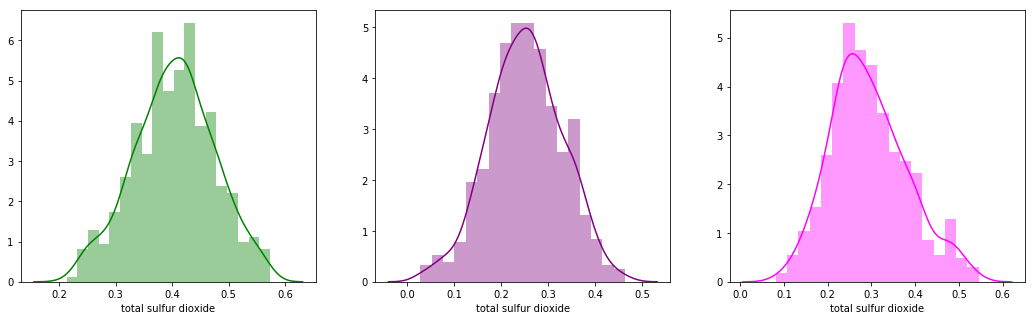

In [105]:
fig, axs = plt.subplots(ncols=3,figsize=(18,5))
sns.distplot(label4["total sulfur dioxide"],ax=axs[0],color='green')

sns.distplot(label5["total sulfur dioxide"],ax=axs[1],color='purple')

sns.distplot(label6["total sulfur dioxide"],ax=axs[2],color='magenta')

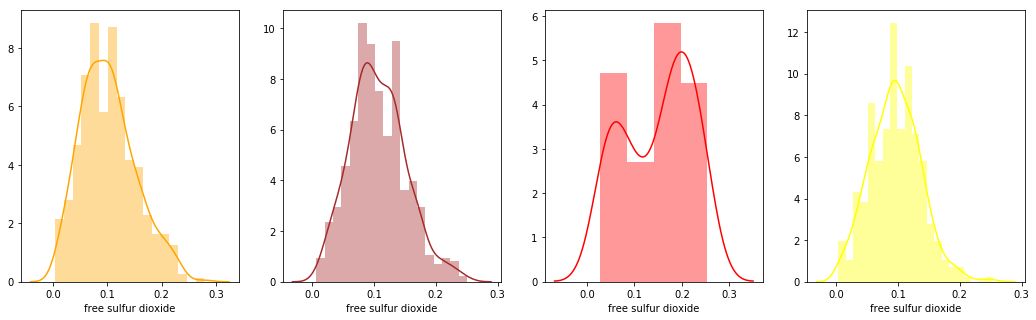

In [106]:
fig, axs = plt.subplots(ncols=4,figsize=(18,5))

sns.distplot(label0["free sulfur dioxide"],ax=axs[0],color='orange')

sns.distplot(label1["free sulfur dioxide"],ax=axs[1],color='brown')

sns.distplot(label2["free sulfur dioxide"],ax=axs[2],color='red')

sns.distplot(label3["free sulfur dioxide"],ax=axs[3],color='yellow')

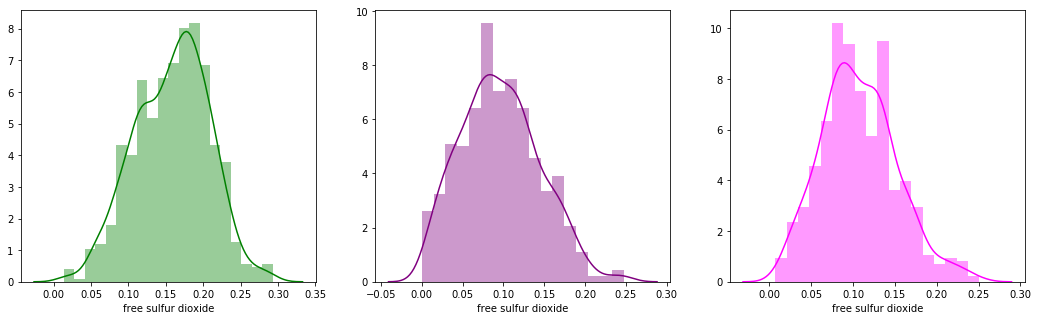

In [107]:
fig, axs = plt.subplots(ncols=3,figsize=(18,5))
sns.distplot(label4["free sulfur dioxide"],ax=axs[0],color='green')

sns.distplot(label5["free sulfur dioxide"],ax=axs[1],color='purple')

sns.distplot(label6["free sulfur dioxide"],ax=axs[2],color='magenta')

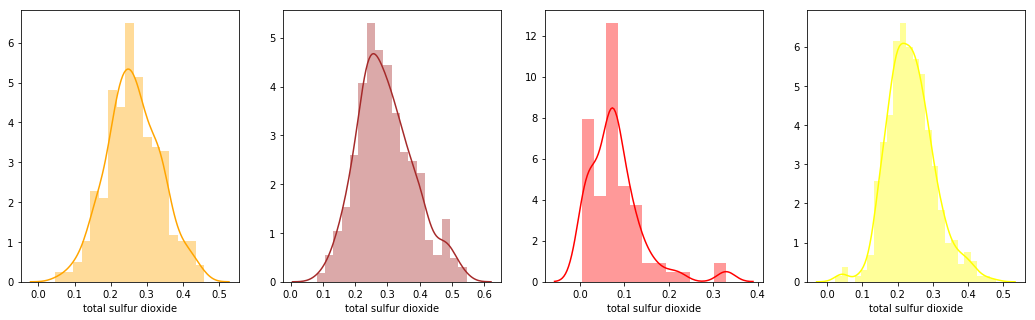

In [109]:
fig, axs = plt.subplots(ncols=4,figsize=(18,5))

sns.distplot(label0["total sulfur dioxide"],ax=axs[0],color='orange')

sns.distplot(label1["total sulfur dioxide"],ax=axs[1],color='brown')

sns.distplot(label2["total sulfur dioxide"],ax=axs[2],color='red')

sns.distplot(label3["total sulfur dioxide"],ax=axs[3],color='yellow')

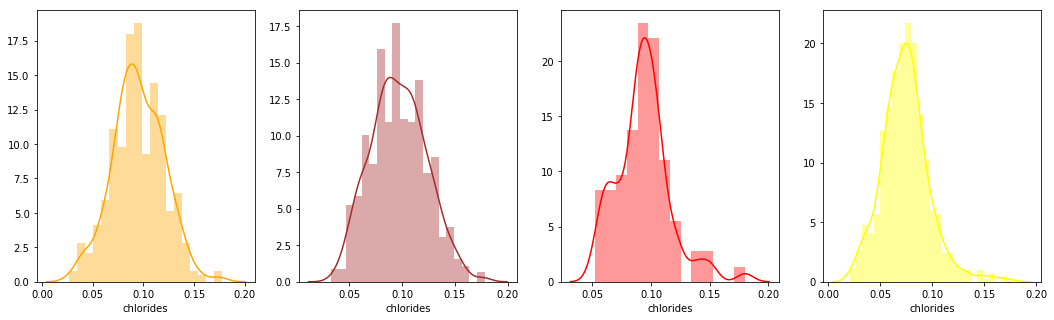

In [110]:
fig, axs = plt.subplots(ncols=4,figsize=(18,5))

sns.distplot(label0["chlorides"],ax=axs[0],color='orange')

sns.distplot(label1["chlorides"],ax=axs[1],color='brown')

sns.distplot(label2["chlorides"],ax=axs[2],color='red')

sns.distplot(label3["chlorides"],ax=axs[3],color='yellow')

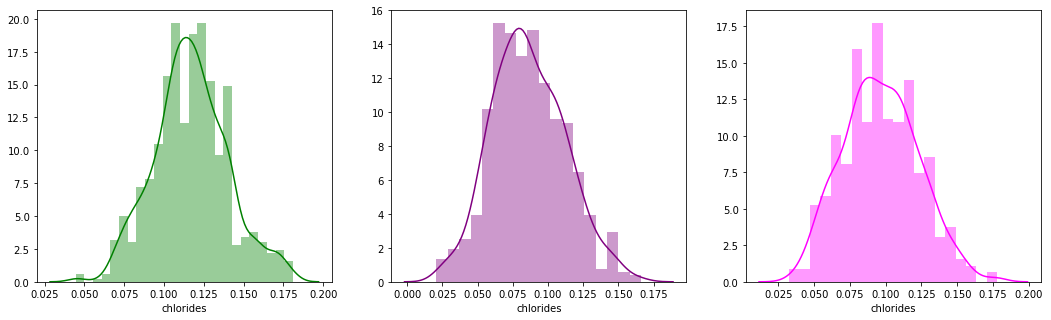

In [111]:
fig, axs = plt.subplots(ncols=3,figsize=(18,5))
sns.distplot(label4["chlorides"],ax=axs[0],color='green')

sns.distplot(label5["chlorides"],ax=axs[1],color='purple')

sns.distplot(label6["chlorides"],ax=axs[2],color='magenta')

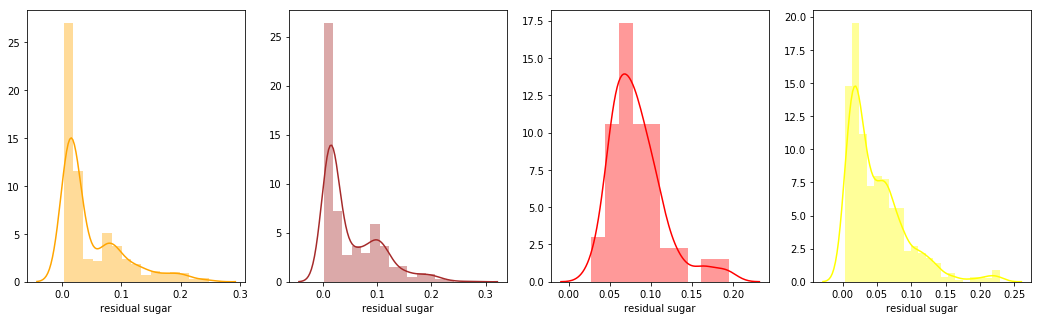

In [112]:
fig, axs = plt.subplots(ncols=4,figsize=(18,5))

sns.distplot(label0["residual sugar"],ax=axs[0],color='orange')

sns.distplot(label1["residual sugar"],ax=axs[1],color='brown')

sns.distplot(label2["residual sugar"],ax=axs[2],color='red')

sns.distplot(label3["residual sugar"],ax=axs[3],color='yellow')

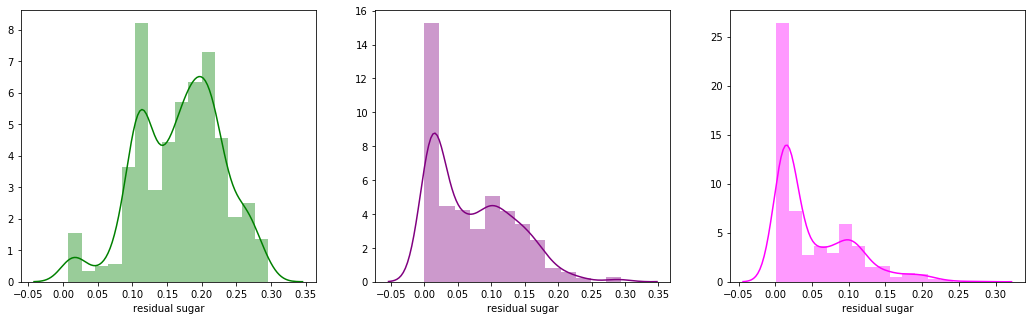

In [113]:
fig, axs = plt.subplots(ncols=3,figsize=(18,5))
sns.distplot(label4["residual sugar"],ax=axs[0],color='green')

sns.distplot(label5["residual sugar"],ax=axs[1],color='purple')

sns.distplot(label6["residual sugar"],ax=axs[2],color='magenta')

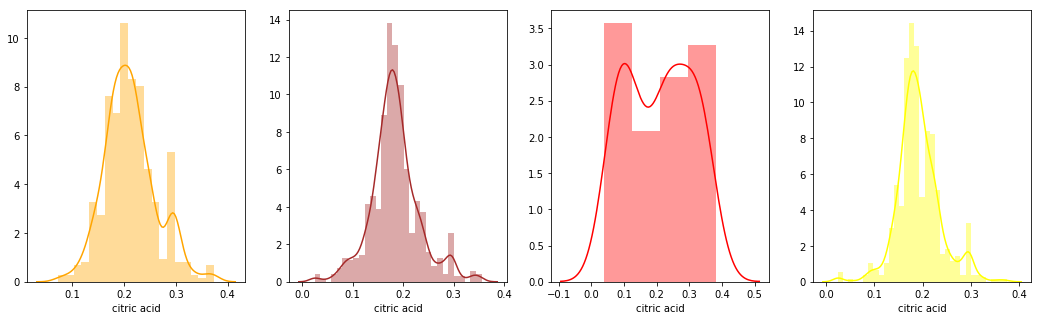

In [114]:
fig, axs = plt.subplots(ncols=4,figsize=(18,5))

sns.distplot(label0["citric acid"],ax=axs[0],color='orange')

sns.distplot(label1["citric acid"],ax=axs[1],color='brown')

sns.distplot(label2["citric acid"],ax=axs[2],color='red')

sns.distplot(label3["citric acid"],ax=axs[3],color='yellow')

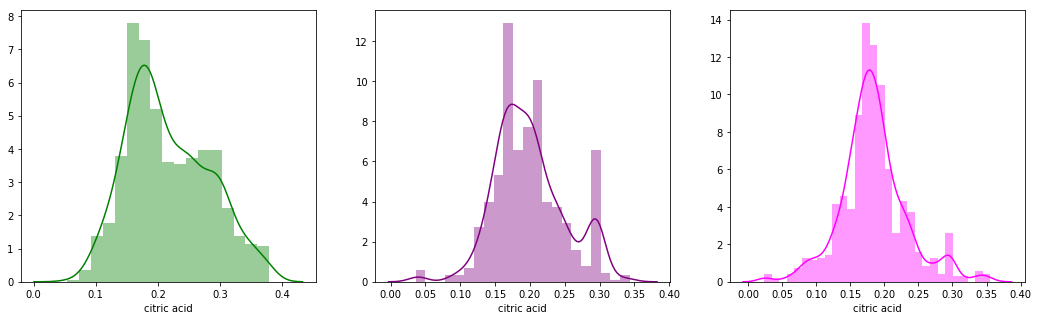

In [115]:
fig, axs = plt.subplots(ncols=3,figsize=(18,5))
sns.distplot(label4["citric acid"],ax=axs[0],color='green')

sns.distplot(label5["citric acid"],ax=axs[1],color='purple')

sns.distplot(label6["citric acid"],ax=axs[2],color='magenta')

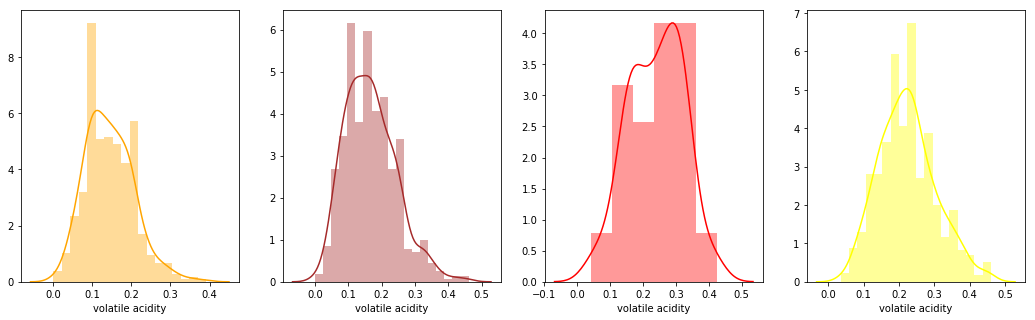

In [116]:
fig, axs = plt.subplots(ncols=4,figsize=(18,5))

sns.distplot(label0["volatile acidity"],ax=axs[0],color='orange')

sns.distplot(label1["volatile acidity"],ax=axs[1],color='brown')

sns.distplot(label2["volatile acidity"],ax=axs[2],color='red')

sns.distplot(label3["volatile acidity"],ax=axs[3],color='yellow')

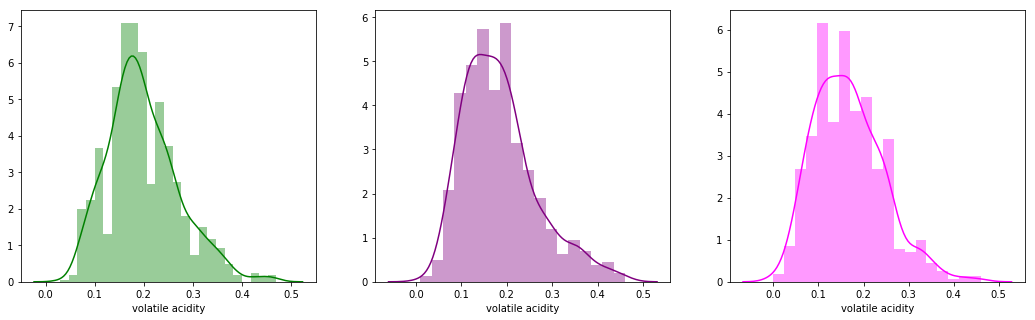

In [117]:
fig, axs = plt.subplots(ncols=3,figsize=(18,5))
sns.distplot(label4["volatile acidity"],ax=axs[0],color='green')

sns.distplot(label5["volatile acidity"],ax=axs[1],color='purple')

sns.distplot(label6["volatile acidity"],ax=axs[2],color='magenta')

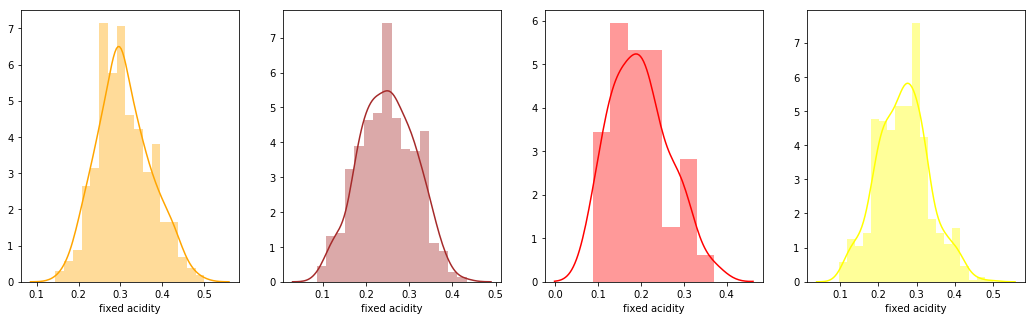

In [118]:
fig, axs = plt.subplots(ncols=4,figsize=(18,5))

sns.distplot(label0["fixed acidity"],ax=axs[0],color='orange')

sns.distplot(label1["fixed acidity"],ax=axs[1],color='brown')

sns.distplot(label2["fixed acidity"],ax=axs[2],color='red')

sns.distplot(label3["fixed acidity"],ax=axs[3],color='yellow')

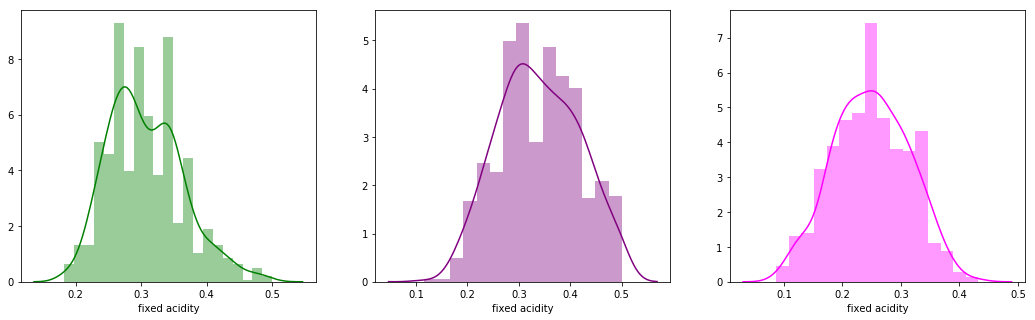

In [119]:
fig, axs = plt.subplots(ncols=3,figsize=(18,5))
sns.distplot(label4["fixed acidity"],ax=axs[0],color='green')

sns.distplot(label5["fixed acidity"],ax=axs[1],color='purple')

sns.distplot(label6["fixed acidity"],ax=axs[2],color='magenta')

In [179]:
#maybe look int color counts

I see no discernible pattern between the clusters.

a
